# Statistical Power - Lab

## Introduction


In this lesson, you'll practice doing a power-analysis during experimental design. As you've seen, power analysis allows you to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows you to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## Let's get started!
  
To start, let's import the necessary libraries required for this simuation:.

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas
import matplotlib.pyplot as plt

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

With this, the researcher writes the null hypothesis: 

    There is no difference between experimental and control means i.e. H0 is equal to H1

And the alternative Hypothesis:

    There is a difference between experimental and control means i.e. H0 is not equal to H1

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

To determine the practicality of this experimental design, you'll a power analysis simulation.

In [ ]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = .21

# Experimental group
experimental_mean = .17
experimental_sd = .21

#Set the number of simulations for our test = 1000
n_sim = 1000

You can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our `p` array. Perform following tasks.

* Initialize a numpy array and fill it with Nan values for storing the results (p_value) of the independance T-test.
* For defined number of simulations (i.e. 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independant t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected


In [3]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for n in range(n_sim):
    control = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
    experimental = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=sample_size)
    
    t_test = stats.ttest_ind(control, experimental)
    p[n] = t_test[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < .05)
reject_proportion = num_null_rejects/n_sim

reject_proportion

# 0.495

0.495

These results indicate that using 12 participants in each group and with given statistics, the statistical power of the experimetn is 49%. This can be interpreted as follows:

> **If a large effect (.17 or greater) is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of the time. **

## Sample size requirements for a given effect size

Often in behavioral research .8 is accepted as a sufficient level of power.  

Clearly, this is not the case for the experiment as currently designed. Determine the required sample size in order to identify a difference of .17 or greater between the group means with an 80% power.

In [4]:
# required power 0.95
target = .8

In [5]:
# minimum sample size to start the simulations 
sample_size = 12
current = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initiliaze a list for storing samplesize x power summary
* While current power is less than target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size , power
    * increase the sample size by 1 and repeat

In [ ]:
np.random.seed(10)

power_sample = []

desired_power = False
sample_size = 12
# keep iterating as shown above until desired power is obtained
while not desired_power:
    print('toto')
#     p = (np.empty(n_sim))
#     p.fill(np.nan)
    
    #  Run a for loop for range of values in n_sim
    control = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
    experimental = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=sample_size)

    t_test = stats.ttest_ind(control, experimental)
# #     p[n] = t_test[1]

#     # number of null hypothesis rejections
# #     num_null_rejects = np.sum(p < .05)
# #     print(num_null_rejects)
#     print(sample_size)
    power = t_test[1]
    print("Number of Samples:", sample_size,", Calculated Power =", power)
    power_sample.append([ sample_size, power])
    desired_power = power >= target
#     desired_power = True
    sample_size += 1
    

toto
Number of Samples: 12 , Calculated Power = 0.2357322902111034
toto
Number of Samples: 13 , Calculated Power = 0.3248145408316939
toto
Number of Samples: 14 , Calculated Power = 0.07122955943584106
toto
Number of Samples: 15 , Calculated Power = 0.0593807310518482
toto
Number of Samples: 16 , Calculated Power = 0.004179627972383198
toto
Number of Samples: 17 , Calculated Power = 0.16548597705172052
toto
Number of Samples: 18 , Calculated Power = 0.16800461421868193
toto
Number of Samples: 19 , Calculated Power = 0.20335784864975148
toto
Number of Samples: 20 , Calculated Power = 0.007849220621128963
toto
Number of Samples: 21 , Calculated Power = 0.0240263312615324
toto
Number of Samples: 22 , Calculated Power = 0.06771348569337414
toto
Number of Samples: 23 , Calculated Power = 0.03587295723258632
toto
Number of Samples: 24 , Calculated Power = 0.11698860311790074
toto
Number of Samples: 25 , Calculated Power = 0.001615586830707457
toto
Number of Samples: 26 , Calculated Power = 1

Number of Samples: 164 , Calculated Power = 1.3236120310237678e-14
toto
Number of Samples: 165 , Calculated Power = 1.1956385960571137e-09
toto
Number of Samples: 166 , Calculated Power = 3.954247498895375e-09
toto
Number of Samples: 167 , Calculated Power = 1.0335093128150114e-08
toto
Number of Samples: 168 , Calculated Power = 1.8817255557262657e-14
toto
Number of Samples: 169 , Calculated Power = 3.719221360290979e-10
toto
Number of Samples: 170 , Calculated Power = 1.3227461476784177e-14
toto
Number of Samples: 171 , Calculated Power = 3.461538578474041e-12
toto
Number of Samples: 172 , Calculated Power = 1.0191373063631335e-07
toto
Number of Samples: 173 , Calculated Power = 1.4973072708976167e-11
toto
Number of Samples: 174 , Calculated Power = 4.601449578902113e-13
toto
Number of Samples: 175 , Calculated Power = 7.707230640505283e-14
toto
Number of Samples: 176 , Calculated Power = 5.070189924822751e-10
toto
Number of Samples: 177 , Calculated Power = 2.2607232789711022e-11
tot

Number of Samples: 320 , Calculated Power = 5.402262651950693e-18
toto
Number of Samples: 321 , Calculated Power = 5.009753982621813e-21
toto
Number of Samples: 322 , Calculated Power = 1.3632655635128373e-24
toto
Number of Samples: 323 , Calculated Power = 2.843118996981913e-19
toto
Number of Samples: 324 , Calculated Power = 2.891259558043187e-26
toto
Number of Samples: 325 , Calculated Power = 2.2616442303527064e-21
toto
Number of Samples: 326 , Calculated Power = 2.657158411275583e-21
toto
Number of Samples: 327 , Calculated Power = 2.8561320003157116e-28
toto
Number of Samples: 328 , Calculated Power = 7.683920998400436e-24
toto
Number of Samples: 329 , Calculated Power = 2.8036925628043878e-24
toto
Number of Samples: 330 , Calculated Power = 1.6265053149919595e-25
toto
Number of Samples: 331 , Calculated Power = 3.9144291655100514e-20
toto
Number of Samples: 332 , Calculated Power = 1.0091853822415929e-23
toto
Number of Samples: 333 , Calculated Power = 1.0750003493402328e-16
tot

Number of Samples: 468 , Calculated Power = 2.6095972606232983e-42
toto
Number of Samples: 469 , Calculated Power = 6.621735684230607e-35
toto
Number of Samples: 470 , Calculated Power = 5.043205995345394e-38
toto
Number of Samples: 471 , Calculated Power = 5.5138729227356366e-36
toto
Number of Samples: 472 , Calculated Power = 1.791948810318977e-26
toto
Number of Samples: 473 , Calculated Power = 1.9998073549182845e-46
toto
Number of Samples: 474 , Calculated Power = 1.6190223530077047e-26
toto
Number of Samples: 475 , Calculated Power = 2.3890522669232824e-38
toto
Number of Samples: 476 , Calculated Power = 4.533536627437294e-37
toto
Number of Samples: 477 , Calculated Power = 5.059729562290255e-31
toto
Number of Samples: 478 , Calculated Power = 6.404170740884457e-35
toto
Number of Samples: 479 , Calculated Power = 1.5874578424667575e-28
toto
Number of Samples: 480 , Calculated Power = 2.2116590322293475e-42
toto
Number of Samples: 481 , Calculated Power = 1.2815517442965446e-36
tot

Number of Samples: 624 , Calculated Power = 2.753248635470166e-46
toto
Number of Samples: 625 , Calculated Power = 3.663498010464954e-40
toto
Number of Samples: 626 , Calculated Power = 2.02512727948745e-48
toto
Number of Samples: 627 , Calculated Power = 2.0526320213677107e-43
toto
Number of Samples: 628 , Calculated Power = 1.776801448869069e-35
toto
Number of Samples: 629 , Calculated Power = 1.766349576968169e-53
toto
Number of Samples: 630 , Calculated Power = 1.928473752919812e-49
toto
Number of Samples: 631 , Calculated Power = 2.7698753623796948e-59
toto
Number of Samples: 632 , Calculated Power = 2.9034175061867773e-39
toto
Number of Samples: 633 , Calculated Power = 2.802105888059087e-45
toto
Number of Samples: 634 , Calculated Power = 9.378873863032152e-45
toto
Number of Samples: 635 , Calculated Power = 9.639543706726041e-29
toto
Number of Samples: 636 , Calculated Power = 8.887018855184871e-49
toto
Number of Samples: 637 , Calculated Power = 5.320851911476362e-49
toto
Numb

Number of Samples: 776 , Calculated Power = 4.37909058120481e-50
toto
Number of Samples: 777 , Calculated Power = 7.43346118441073e-56
toto
Number of Samples: 778 , Calculated Power = 5.467272468638499e-59
toto
Number of Samples: 779 , Calculated Power = 5.710539512236656e-57
toto
Number of Samples: 780 , Calculated Power = 8.247288606470478e-59
toto
Number of Samples: 781 , Calculated Power = 3.49075116110532e-68
toto
Number of Samples: 782 , Calculated Power = 4.704959040729312e-60
toto
Number of Samples: 783 , Calculated Power = 2.1585496713034755e-54
toto
Number of Samples: 784 , Calculated Power = 5.945655980044065e-62
toto
Number of Samples: 785 , Calculated Power = 3.946215780023635e-43
toto
Number of Samples: 786 , Calculated Power = 2.6625418922817116e-44
toto
Number of Samples: 787 , Calculated Power = 3.174200074614405e-48
toto
Number of Samples: 788 , Calculated Power = 1.3234611139216825e-56
toto
Number of Samples: 789 , Calculated Power = 2.8260941078723744e-52
toto
Numbe

Number of Samples: 928 , Calculated Power = 9.132361129750421e-74
toto
Number of Samples: 929 , Calculated Power = 3.514518026828399e-67
toto
Number of Samples: 930 , Calculated Power = 1.0241107315337694e-57
toto
Number of Samples: 931 , Calculated Power = 8.669600530241613e-55
toto
Number of Samples: 932 , Calculated Power = 2.1519785166759213e-57
toto
Number of Samples: 933 , Calculated Power = 1.4769271888806316e-56
toto
Number of Samples: 934 , Calculated Power = 2.6093802108789195e-62
toto
Number of Samples: 935 , Calculated Power = 2.1587352170131742e-65
toto
Number of Samples: 936 , Calculated Power = 4.224242195465519e-67
toto
Number of Samples: 937 , Calculated Power = 1.5769451368447273e-74
toto
Number of Samples: 938 , Calculated Power = 3.143133802655423e-61
toto
Number of Samples: 939 , Calculated Power = 2.9454756067733603e-71
toto
Number of Samples: 940 , Calculated Power = 4.148846355361969e-72
toto
Number of Samples: 941 , Calculated Power = 4.674408884322683e-66
toto

Number of Samples: 1092 , Calculated Power = 1.7005925543710717e-55
toto
Number of Samples: 1093 , Calculated Power = 3.367284069615258e-75
toto
Number of Samples: 1094 , Calculated Power = 3.4075135749467554e-77
toto
Number of Samples: 1095 , Calculated Power = 7.461739746203864e-78
toto
Number of Samples: 1096 , Calculated Power = 3.4243406685375364e-74
toto
Number of Samples: 1097 , Calculated Power = 3.396926691660666e-72
toto
Number of Samples: 1098 , Calculated Power = 1.5251396195527296e-82
toto
Number of Samples: 1099 , Calculated Power = 1.4588131467143123e-71
toto
Number of Samples: 1100 , Calculated Power = 4.585389567451043e-76
toto
Number of Samples: 1101 , Calculated Power = 4.525839581597988e-79
toto
Number of Samples: 1102 , Calculated Power = 5.166158790104445e-76
toto
Number of Samples: 1103 , Calculated Power = 6.702566373039797e-72
toto
Number of Samples: 1104 , Calculated Power = 3.1085376198517964e-71
toto
Number of Samples: 1105 , Calculated Power = 4.46573131506

Number of Samples: 1245 , Calculated Power = 4.15414230048902e-79
toto
Number of Samples: 1246 , Calculated Power = 2.0742783398978986e-89
toto
Number of Samples: 1247 , Calculated Power = 1.0249204993056503e-87
toto
Number of Samples: 1248 , Calculated Power = 4.822121508970083e-92
toto
Number of Samples: 1249 , Calculated Power = 1.345257046227843e-82
toto
Number of Samples: 1250 , Calculated Power = 1.6774298462887858e-76
toto
Number of Samples: 1251 , Calculated Power = 1.728643801286511e-80
toto
Number of Samples: 1252 , Calculated Power = 4.6286818233109e-79
toto
Number of Samples: 1253 , Calculated Power = 3.6951343409696637e-84
toto
Number of Samples: 1254 , Calculated Power = 1.8353300410128815e-85
toto
Number of Samples: 1255 , Calculated Power = 1.1616081182137222e-78
toto
Number of Samples: 1256 , Calculated Power = 3.9475750887414086e-78
toto
Number of Samples: 1257 , Calculated Power = 7.035037942603461e-92
toto
Number of Samples: 1258 , Calculated Power = 1.0474827031654

Number of Samples: 1404 , Calculated Power = 1.0746331316847494e-111
toto
Number of Samples: 1405 , Calculated Power = 6.957804633903547e-92
toto
Number of Samples: 1406 , Calculated Power = 8.628295920867884e-92
toto
Number of Samples: 1407 , Calculated Power = 1.0228346420303596e-88
toto
Number of Samples: 1408 , Calculated Power = 2.1822818578313717e-94
toto
Number of Samples: 1409 , Calculated Power = 1.0685233701269314e-99
toto
Number of Samples: 1410 , Calculated Power = 9.478337255354135e-101
toto
Number of Samples: 1411 , Calculated Power = 1.9554296040972254e-99
toto
Number of Samples: 1412 , Calculated Power = 1.1111519895053338e-110
toto
Number of Samples: 1413 , Calculated Power = 7.407950117278992e-108
toto
Number of Samples: 1414 , Calculated Power = 2.241346564127112e-103
toto
Number of Samples: 1415 , Calculated Power = 9.045388724515958e-101
toto
Number of Samples: 1416 , Calculated Power = 1.4890643271796214e-105
toto
Number of Samples: 1417 , Calculated Power = 3.389

Number of Samples: 1565 , Calculated Power = 2.741365906743893e-122
toto
Number of Samples: 1566 , Calculated Power = 1.754183579763702e-99
toto
Number of Samples: 1567 , Calculated Power = 7.58441159832992e-97
toto
Number of Samples: 1568 , Calculated Power = 5.548731325357854e-89
toto
Number of Samples: 1569 , Calculated Power = 3.3254459137582626e-105
toto
Number of Samples: 1570 , Calculated Power = 1.8658456518605405e-108
toto
Number of Samples: 1571 , Calculated Power = 1.2536646288630846e-112
toto
Number of Samples: 1572 , Calculated Power = 9.216101502349976e-113
toto
Number of Samples: 1573 , Calculated Power = 4.4376559614647764e-100
toto
Number of Samples: 1574 , Calculated Power = 7.52660305417639e-104
toto
Number of Samples: 1575 , Calculated Power = 2.456530917456711e-104
toto
Number of Samples: 1576 , Calculated Power = 8.539228538378815e-118
toto
Number of Samples: 1577 , Calculated Power = 9.429409373305038e-96
toto
Number of Samples: 1578 , Calculated Power = 1.765044

Number of Samples: 1722 , Calculated Power = 1.7498217084472207e-122
toto
Number of Samples: 1723 , Calculated Power = 7.224060441238499e-110
toto
Number of Samples: 1724 , Calculated Power = 3.8502481758587994e-122
toto
Number of Samples: 1725 , Calculated Power = 1.1351048701711817e-113
toto
Number of Samples: 1726 , Calculated Power = 1.1650257966286872e-117
toto
Number of Samples: 1727 , Calculated Power = 1.757821071768093e-105
toto
Number of Samples: 1728 , Calculated Power = 2.2300416582798958e-108
toto
Number of Samples: 1729 , Calculated Power = 4.084858788159804e-102
toto
Number of Samples: 1730 , Calculated Power = 2.86865105372807e-113
toto
Number of Samples: 1731 , Calculated Power = 2.0953356336491042e-108
toto
Number of Samples: 1732 , Calculated Power = 2.354839550940693e-100
toto
Number of Samples: 1733 , Calculated Power = 1.3894938991126659e-109
toto
Number of Samples: 1734 , Calculated Power = 2.5889242397305494e-124
toto
Number of Samples: 1735 , Calculated Power =

Number of Samples: 1884 , Calculated Power = 1.4580028373937099e-120
toto
Number of Samples: 1885 , Calculated Power = 1.7380971105847406e-131
toto
Number of Samples: 1886 , Calculated Power = 2.0397904297336767e-128
toto
Number of Samples: 1887 , Calculated Power = 1.1330553597145056e-107
toto
Number of Samples: 1888 , Calculated Power = 8.204835041029319e-125
toto
Number of Samples: 1889 , Calculated Power = 9.936087967824164e-137
toto
Number of Samples: 1890 , Calculated Power = 1.9591416306713338e-138
toto
Number of Samples: 1891 , Calculated Power = 7.500350328495159e-123
toto
Number of Samples: 1892 , Calculated Power = 4.245975682686495e-120
toto
Number of Samples: 1893 , Calculated Power = 2.1938332746223994e-119
toto
Number of Samples: 1894 , Calculated Power = 5.366865493679148e-132
toto
Number of Samples: 1895 , Calculated Power = 2.9249940314689568e-139
toto
Number of Samples: 1896 , Calculated Power = 6.839305803695968e-133
toto
Number of Samples: 1897 , Calculated Power =

Number of Samples: 2035 , Calculated Power = 1.0653025232456996e-147
toto
Number of Samples: 2036 , Calculated Power = 2.4923339382786125e-131
toto
Number of Samples: 2037 , Calculated Power = 1.0625724220826176e-148
toto
Number of Samples: 2038 , Calculated Power = 9.580057488212866e-141
toto
Number of Samples: 2039 , Calculated Power = 3.5583367492142553e-129
toto
Number of Samples: 2040 , Calculated Power = 1.203317632714306e-125
toto
Number of Samples: 2041 , Calculated Power = 5.04468581968895e-122
toto
Number of Samples: 2042 , Calculated Power = 5.5014565281045955e-136
toto
Number of Samples: 2043 , Calculated Power = 4.311029726717074e-136
toto
Number of Samples: 2044 , Calculated Power = 2.1068778707701984e-152
toto
Number of Samples: 2045 , Calculated Power = 7.086082086602086e-131
toto
Number of Samples: 2046 , Calculated Power = 3.917358266720683e-138
toto
Number of Samples: 2047 , Calculated Power = 1.271719188590894e-142
toto
Number of Samples: 2048 , Calculated Power = 1

Number of Samples: 2181 , Calculated Power = 2.5875605703784076e-151
toto
Number of Samples: 2182 , Calculated Power = 2.1769394989412036e-161
toto
Number of Samples: 2183 , Calculated Power = 4.69540939429888e-151
toto
Number of Samples: 2184 , Calculated Power = 1.914680206493387e-147
toto
Number of Samples: 2185 , Calculated Power = 1.4852984542699566e-129
toto
Number of Samples: 2186 , Calculated Power = 3.816147066233918e-133
toto
Number of Samples: 2187 , Calculated Power = 1.1585193873607532e-151
toto
Number of Samples: 2188 , Calculated Power = 1.943696980699718e-136
toto
Number of Samples: 2189 , Calculated Power = 5.974021687395213e-159
toto
Number of Samples: 2190 , Calculated Power = 5.657560626973175e-144
toto
Number of Samples: 2191 , Calculated Power = 1.2540641180675848e-146
toto
Number of Samples: 2192 , Calculated Power = 5.683553046085761e-159
toto
Number of Samples: 2193 , Calculated Power = 1.783252184856451e-148
toto
Number of Samples: 2194 , Calculated Power = 5.

Number of Samples: 2334 , Calculated Power = 8.471307114124614e-161
toto
Number of Samples: 2335 , Calculated Power = 1.3872299119316787e-154
toto
Number of Samples: 2336 , Calculated Power = 7.250552417518866e-140
toto
Number of Samples: 2337 , Calculated Power = 8.655067846059685e-154
toto
Number of Samples: 2338 , Calculated Power = 1.0056685754083379e-166
toto
Number of Samples: 2339 , Calculated Power = 4.384749771331582e-152
toto
Number of Samples: 2340 , Calculated Power = 1.8347272994749962e-138
toto
Number of Samples: 2341 , Calculated Power = 5.178792964913957e-148
toto
Number of Samples: 2342 , Calculated Power = 2.034921852074245e-171
toto
Number of Samples: 2343 , Calculated Power = 1.018405415948157e-139
toto
Number of Samples: 2344 , Calculated Power = 1.7586190248727098e-154
toto
Number of Samples: 2345 , Calculated Power = 6.589821744608194e-137
toto
Number of Samples: 2346 , Calculated Power = 2.5867181196786894e-157
toto
Number of Samples: 2347 , Calculated Power = 4

Number of Samples: 2488 , Calculated Power = 7.024940310898608e-163
toto
Number of Samples: 2489 , Calculated Power = 2.0203862695308462e-163
toto
Number of Samples: 2490 , Calculated Power = 1.1730557454271602e-163
toto
Number of Samples: 2491 , Calculated Power = 5.981993209579943e-180
toto
Number of Samples: 2492 , Calculated Power = 3.202375408807791e-151
toto
Number of Samples: 2493 , Calculated Power = 7.285887888762435e-185
toto
Number of Samples: 2494 , Calculated Power = 3.764642584396426e-154
toto
Number of Samples: 2495 , Calculated Power = 3.435328663618094e-157
toto
Number of Samples: 2496 , Calculated Power = 6.907860483395989e-162
toto
Number of Samples: 2497 , Calculated Power = 4.1775539118239815e-167
toto
Number of Samples: 2498 , Calculated Power = 1.7201582081164317e-191
toto
Number of Samples: 2499 , Calculated Power = 1.7630413473911494e-189
toto
Number of Samples: 2500 , Calculated Power = 1.7046728285126906e-158
toto
Number of Samples: 2501 , Calculated Power = 

Number of Samples: 2628 , Calculated Power = 2.4671361738850435e-161
toto
Number of Samples: 2629 , Calculated Power = 8.870988102986725e-175
toto
Number of Samples: 2630 , Calculated Power = 8.560885622984242e-181
toto
Number of Samples: 2631 , Calculated Power = 2.387334656584073e-184
toto
Number of Samples: 2632 , Calculated Power = 7.657376498873055e-183
toto
Number of Samples: 2633 , Calculated Power = 2.631530236912035e-168
toto
Number of Samples: 2634 , Calculated Power = 1.5424945732216932e-176
toto
Number of Samples: 2635 , Calculated Power = 5.9406630617199886e-179
toto
Number of Samples: 2636 , Calculated Power = 6.346790375950422e-163
toto
Number of Samples: 2637 , Calculated Power = 1.9359109055269023e-180
toto
Number of Samples: 2638 , Calculated Power = 5.460724832460138e-176
toto
Number of Samples: 2639 , Calculated Power = 2.4923640635174683e-174
toto
Number of Samples: 2640 , Calculated Power = 5.103579013034812e-182
toto
Number of Samples: 2641 , Calculated Power = 1

Number of Samples: 2757 , Calculated Power = 6.3593736867565135e-174
toto
Number of Samples: 2758 , Calculated Power = 4.4711367959257746e-191
toto
Number of Samples: 2759 , Calculated Power = 2.724389410102247e-180
toto
Number of Samples: 2760 , Calculated Power = 3.874457287455836e-185
toto
Number of Samples: 2761 , Calculated Power = 6.711380144498721e-174
toto
Number of Samples: 2762 , Calculated Power = 3.972896286466033e-183
toto
Number of Samples: 2763 , Calculated Power = 5.882294200071728e-189
toto
Number of Samples: 2764 , Calculated Power = 1.1573753065251204e-163
toto
Number of Samples: 2765 , Calculated Power = 2.3988116657948936e-204
toto
Number of Samples: 2766 , Calculated Power = 1.7071536110445463e-185
toto
Number of Samples: 2767 , Calculated Power = 4.4216950306049625e-184
toto
Number of Samples: 2768 , Calculated Power = 1.5634245372852233e-178
toto
Number of Samples: 2769 , Calculated Power = 1.7275500561662996e-168
toto
Number of Samples: 2770 , Calculated Power 

Number of Samples: 2893 , Calculated Power = 4.969538501495708e-196
toto
Number of Samples: 2894 , Calculated Power = 1.805092326244506e-195
toto
Number of Samples: 2895 , Calculated Power = 4.72759677180581e-190
toto
Number of Samples: 2896 , Calculated Power = 1.6874374258591732e-204
toto
Number of Samples: 2897 , Calculated Power = 5.082105782040949e-189
toto
Number of Samples: 2898 , Calculated Power = 5.141271965406268e-186
toto
Number of Samples: 2899 , Calculated Power = 5.823400203587812e-196
toto
Number of Samples: 2900 , Calculated Power = 1.8846078408602615e-223
toto
Number of Samples: 2901 , Calculated Power = 7.701724806600178e-196
toto
Number of Samples: 2902 , Calculated Power = 1.99493843026684e-182
toto
Number of Samples: 2903 , Calculated Power = 3.5418484858473485e-208
toto
Number of Samples: 2904 , Calculated Power = 1.4692784572409987e-195
toto
Number of Samples: 2905 , Calculated Power = 4.728532219990673e-201
toto
Number of Samples: 2906 , Calculated Power = 8.66

Number of Samples: 3021 , Calculated Power = 3.2319546695603765e-191
toto
Number of Samples: 3022 , Calculated Power = 2.968888725335251e-199
toto
Number of Samples: 3023 , Calculated Power = 3.122430054092655e-207
toto
Number of Samples: 3024 , Calculated Power = 9.341718470777772e-198
toto
Number of Samples: 3025 , Calculated Power = 5.34347812819671e-177
toto
Number of Samples: 3026 , Calculated Power = 3.0663986554893174e-210
toto
Number of Samples: 3027 , Calculated Power = 1.2788330788918801e-216
toto
Number of Samples: 3028 , Calculated Power = 6.8911028541424295e-202
toto
Number of Samples: 3029 , Calculated Power = 1.930694937787789e-210
toto
Number of Samples: 3030 , Calculated Power = 6.215579875042655e-179
toto
Number of Samples: 3031 , Calculated Power = 9.173713527105428e-208
toto
Number of Samples: 3032 , Calculated Power = 1.2104120396544433e-200
toto
Number of Samples: 3033 , Calculated Power = 1.4970068916423588e-208
toto
Number of Samples: 3034 , Calculated Power = 2

toto
Number of Samples: 3147 , Calculated Power = 3.0892130552040474e-230
toto
Number of Samples: 3148 , Calculated Power = 1.500866023547642e-177
toto
Number of Samples: 3149 , Calculated Power = 5.946390244227323e-190
toto
Number of Samples: 3150 , Calculated Power = 8.517535886882033e-184
toto
Number of Samples: 3151 , Calculated Power = 1.2375934599041505e-215
toto
Number of Samples: 3152 , Calculated Power = 1.9151637897839914e-199
toto
Number of Samples: 3153 , Calculated Power = 4.9154618108929623e-197
toto
Number of Samples: 3154 , Calculated Power = 1.0387591650189846e-196
toto
Number of Samples: 3155 , Calculated Power = 3.239901969795778e-211
toto
Number of Samples: 3156 , Calculated Power = 1.8686404926639399e-221
toto
Number of Samples: 3157 , Calculated Power = 6.012024707310409e-227
toto
Number of Samples: 3158 , Calculated Power = 1.533165899046755e-178
toto
Number of Samples: 3159 , Calculated Power = 1.794744319434856e-208
toto
Number of Samples: 3160 , Calculated Pow

Number of Samples: 3275 , Calculated Power = 3.2544083816943446e-210
toto
Number of Samples: 3276 , Calculated Power = 1.55329137467739e-217
toto
Number of Samples: 3277 , Calculated Power = 2.5195100870607465e-215
toto
Number of Samples: 3278 , Calculated Power = 1.5465012836249886e-220
toto
Number of Samples: 3279 , Calculated Power = 5.246782647563296e-200
toto
Number of Samples: 3280 , Calculated Power = 5.5813975716024745e-235
toto
Number of Samples: 3281 , Calculated Power = 3.620632997988764e-225
toto
Number of Samples: 3282 , Calculated Power = 1.9165559491729684e-218
toto
Number of Samples: 3283 , Calculated Power = 1.3697962685830216e-206
toto
Number of Samples: 3284 , Calculated Power = 1.5809957535929318e-227
toto
Number of Samples: 3285 , Calculated Power = 3.6333158540738954e-214
toto
Number of Samples: 3286 , Calculated Power = 1.5137196881422638e-234
toto
Number of Samples: 3287 , Calculated Power = 5.457604997767131e-210
toto
Number of Samples: 3288 , Calculated Power 

Number of Samples: 3415 , Calculated Power = 1.321254469174126e-224
toto
Number of Samples: 3416 , Calculated Power = 4.807367826866958e-227
toto
Number of Samples: 3417 , Calculated Power = 1.540442868449466e-198
toto
Number of Samples: 3418 , Calculated Power = 8.01329212817235e-239
toto
Number of Samples: 3419 , Calculated Power = 1.3556927053569771e-223
toto
Number of Samples: 3420 , Calculated Power = 7.263585281900225e-229
toto
Number of Samples: 3421 , Calculated Power = 1.0866589970367474e-228
toto
Number of Samples: 3422 , Calculated Power = 1.5397581223602733e-228
toto
Number of Samples: 3423 , Calculated Power = 1.2468734958039889e-235
toto
Number of Samples: 3424 , Calculated Power = 7.250067788050095e-234
toto
Number of Samples: 3425 , Calculated Power = 1.7791814468560982e-232
toto
Number of Samples: 3426 , Calculated Power = 5.27651741762836e-249
toto
Number of Samples: 3427 , Calculated Power = 4.6677428313675656e-222
toto
Number of Samples: 3428 , Calculated Power = 2.

Number of Samples: 3569 , Calculated Power = 1.6105585305879552e-229
toto
Number of Samples: 3570 , Calculated Power = 4.383383308168043e-231
toto
Number of Samples: 3571 , Calculated Power = 4.676249986041653e-232
toto
Number of Samples: 3572 , Calculated Power = 2.696223467629724e-229
toto
Number of Samples: 3573 , Calculated Power = 4.694435171556561e-246
toto
Number of Samples: 3574 , Calculated Power = 1.7554280208304008e-249
toto
Number of Samples: 3575 , Calculated Power = 5.061721289278548e-225
toto
Number of Samples: 3576 , Calculated Power = 5.535900405085378e-218
toto
Number of Samples: 3577 , Calculated Power = 2.5930657429783127e-261
toto
Number of Samples: 3578 , Calculated Power = 4.849024071193361e-238
toto
Number of Samples: 3579 , Calculated Power = 5.79145901813052e-227
toto
Number of Samples: 3580 , Calculated Power = 5.604581575352742e-230
toto
Number of Samples: 3581 , Calculated Power = 2.4167703153762e-227
toto
Number of Samples: 3582 , Calculated Power = 3.2938

toto
Number of Samples: 3722 , Calculated Power = 2.4187551417822255e-262
toto
Number of Samples: 3723 , Calculated Power = 5.214480279587265e-256
toto
Number of Samples: 3724 , Calculated Power = 7.178880305510606e-229
toto
Number of Samples: 3725 , Calculated Power = 1.1863269330959933e-220
toto
Number of Samples: 3726 , Calculated Power = 6.717085191793021e-239
toto
Number of Samples: 3727 , Calculated Power = 3.217334061854561e-243
toto
Number of Samples: 3728 , Calculated Power = 6.883875364944662e-251
toto
Number of Samples: 3729 , Calculated Power = 4.9547664307414915e-267
toto
Number of Samples: 3730 , Calculated Power = 3.314305794149293e-231
toto
Number of Samples: 3731 , Calculated Power = 3.9125901318468327e-221
toto
Number of Samples: 3732 , Calculated Power = 2.4673542446597158e-231
toto
Number of Samples: 3733 , Calculated Power = 8.044345056433444e-226
toto
Number of Samples: 3734 , Calculated Power = 3.7849815520745366e-244
toto
Number of Samples: 3735 , Calculated Pow

Number of Samples: 3867 , Calculated Power = 1.9177135330319744e-254
toto
Number of Samples: 3868 , Calculated Power = 3.3592731835687294e-274
toto
Number of Samples: 3869 , Calculated Power = 4.612719947025185e-270
toto
Number of Samples: 3870 , Calculated Power = 1.5692507329067006e-263
toto
Number of Samples: 3871 , Calculated Power = 1.1390306085068821e-282
toto
Number of Samples: 3872 , Calculated Power = 3.785204333786019e-270
toto
Number of Samples: 3873 , Calculated Power = 8.146777053316877e-245
toto
Number of Samples: 3874 , Calculated Power = 1.251417021071843e-256
toto
Number of Samples: 3875 , Calculated Power = 4.480270053955569e-261
toto
Number of Samples: 3876 , Calculated Power = 3.477067885990589e-244
toto
Number of Samples: 3877 , Calculated Power = 7.132286339401732e-251
toto
Number of Samples: 3878 , Calculated Power = 8.61900407530955e-267
toto
Number of Samples: 3879 , Calculated Power = 8.861225788846821e-259
toto
Number of Samples: 3880 , Calculated Power = 1.7

Number of Samples: 4004 , Calculated Power = 3.114308215895965e-265
toto
Number of Samples: 4005 , Calculated Power = 1.2023795769158424e-255
toto
Number of Samples: 4006 , Calculated Power = 1.6373726178441725e-296
toto
Number of Samples: 4007 , Calculated Power = 1.0641679883945432e-268
toto
Number of Samples: 4008 , Calculated Power = 3.0940858948193884e-259
toto
Number of Samples: 4009 , Calculated Power = 2.314958457613555e-279
toto
Number of Samples: 4010 , Calculated Power = 1.0145077534117614e-267
toto
Number of Samples: 4011 , Calculated Power = 1.6163410683048577e-265
toto
Number of Samples: 4012 , Calculated Power = 4.6670450932065024e-253
toto
Number of Samples: 4013 , Calculated Power = 3.1646031988138737e-275
toto
Number of Samples: 4014 , Calculated Power = 1.519253136145723e-271
toto
Number of Samples: 4015 , Calculated Power = 2.7539338252511592e-272
toto
Number of Samples: 4016 , Calculated Power = 4.632171331011478e-280
toto
Number of Samples: 4017 , Calculated Power

Number of Samples: 4145 , Calculated Power = 1.597355150815845e-300
toto
Number of Samples: 4146 , Calculated Power = 1.1652902531647308e-305
toto
Number of Samples: 4147 , Calculated Power = 1.5349096515916507e-253
toto
Number of Samples: 4148 , Calculated Power = 7.091221443721313e-268
toto
Number of Samples: 4149 , Calculated Power = 1.1781219394214283e-287
toto
Number of Samples: 4150 , Calculated Power = 1.2819375013200302e-261
toto
Number of Samples: 4151 , Calculated Power = 3.604280982375613e-290
toto
Number of Samples: 4152 , Calculated Power = 6.200455868733026e-278
toto
Number of Samples: 4153 , Calculated Power = 3.0753213407607754e-269
toto
Number of Samples: 4154 , Calculated Power = 1.2301012302470796e-282
toto
Number of Samples: 4155 , Calculated Power = 2.3640483249928323e-286
toto
Number of Samples: 4156 , Calculated Power = 1.2764404159535081e-275
toto
Number of Samples: 4157 , Calculated Power = 1.159430684892406e-288
toto
Number of Samples: 4158 , Calculated Power 

Number of Samples: 4297 , Calculated Power = 1.9411897773506346e-297
toto
Number of Samples: 4298 , Calculated Power = 2.455772670072895e-274
toto
Number of Samples: 4299 , Calculated Power = 2.2496949985719166e-289
toto
Number of Samples: 4300 , Calculated Power = 1.130312567510116e-279
toto
Number of Samples: 4301 , Calculated Power = 7.326693794183166e-293
toto
Number of Samples: 4302 , Calculated Power = 2.6461235041309657e-293
toto
Number of Samples: 4303 , Calculated Power = 1.2321057233856474e-287
toto
Number of Samples: 4304 , Calculated Power = 5.636185999354319e-292
toto
Number of Samples: 4305 , Calculated Power = 8.174578916693573e-283
toto
Number of Samples: 4306 , Calculated Power = 3.544430010812848e-269
toto
Number of Samples: 4307 , Calculated Power = 1.6048955034932278e-293
toto
Number of Samples: 4308 , Calculated Power = 2.702627285431728e-303
toto
Number of Samples: 4309 , Calculated Power = 2.4022309718825258e-290
toto
Number of Samples: 4310 , Calculated Power = 

Number of Samples: 4441 , Calculated Power = 0.0
toto
Number of Samples: 4442 , Calculated Power = 1.0265655909557836e-299
toto
Number of Samples: 4443 , Calculated Power = 3.6559822413322524e-301
toto
Number of Samples: 4444 , Calculated Power = 8.992094526734875e-298
toto
Number of Samples: 4445 , Calculated Power = 2.7038076220222323e-278
toto
Number of Samples: 4446 , Calculated Power = 4.115142239646216e-281
toto
Number of Samples: 4447 , Calculated Power = 1.1883738878482407e-301
toto
Number of Samples: 4448 , Calculated Power = 5.158481974230956e-293
toto
Number of Samples: 4449 , Calculated Power = 0.0
toto
Number of Samples: 4450 , Calculated Power = 1.8083065866481064e-281
toto
Number of Samples: 4451 , Calculated Power = 5.688950385846534e-294
toto
Number of Samples: 4452 , Calculated Power = 3.786612089399894e-309
toto
Number of Samples: 4453 , Calculated Power = 2.6771890375562996e-306
toto
Number of Samples: 4454 , Calculated Power = 3.102770156374047e-294
toto
Number of 

Number of Samples: 4584 , Calculated Power = 2.216680578052623e-293
toto
Number of Samples: 4585 , Calculated Power = 6.508599728618423e-278
toto
Number of Samples: 4586 , Calculated Power = 1.0649305950708738e-305
toto
Number of Samples: 4587 , Calculated Power = 0.0
toto
Number of Samples: 4588 , Calculated Power = 2.0076829452007187e-297
toto
Number of Samples: 4589 , Calculated Power = 6.463485046478693e-303
toto
Number of Samples: 4590 , Calculated Power = 5.262157552015023e-302
toto
Number of Samples: 4591 , Calculated Power = 3.552601065726778e-306
toto
Number of Samples: 4592 , Calculated Power = 6.627921135562717e-297
toto
Number of Samples: 4593 , Calculated Power = 0.0
toto
Number of Samples: 4594 , Calculated Power = 8.580813298295455e-294
toto
Number of Samples: 4595 , Calculated Power = 2.2936283699612904e-284
toto
Number of Samples: 4596 , Calculated Power = 1.3204319165415335e-288
toto
Number of Samples: 4597 , Calculated Power = 4.7644244822559894e-303
toto
Number of S

Number of Samples: 4727 , Calculated Power = 1.1783040416634678e-301
toto
Number of Samples: 4728 , Calculated Power = 0.0
toto
Number of Samples: 4729 , Calculated Power = 0.0
toto
Number of Samples: 4730 , Calculated Power = 0.0
toto
Number of Samples: 4731 , Calculated Power = 0.0
toto
Number of Samples: 4732 , Calculated Power = 0.0
toto
Number of Samples: 4733 , Calculated Power = 6.103785539337345e-303
toto
Number of Samples: 4734 , Calculated Power = 4.151604401036053e-307
toto
Number of Samples: 4735 , Calculated Power = 0.0
toto
Number of Samples: 4736 , Calculated Power = 2.50209678293853e-304
toto
Number of Samples: 4737 , Calculated Power = 1.7763509549715574e-306
toto
Number of Samples: 4738 , Calculated Power = 0.0
toto
Number of Samples: 4739 , Calculated Power = 1.5380539796687128e-299
toto
Number of Samples: 4740 , Calculated Power = 0.0
toto
Number of Samples: 4741 , Calculated Power = 6.710647815460625e-309
toto
Number of Samples: 4742 , Calculated Power = 0.0
toto
N

Number of Samples: 4867 , Calculated Power = 4.965401846535533e-305
toto
Number of Samples: 4868 , Calculated Power = 6.22320325125131e-307
toto
Number of Samples: 4869 , Calculated Power = 0.0
toto
Number of Samples: 4870 , Calculated Power = 0.0
toto
Number of Samples: 4871 , Calculated Power = 0.0
toto
Number of Samples: 4872 , Calculated Power = 1.2794963089264258e-307
toto
Number of Samples: 4873 , Calculated Power = 0.0
toto
Number of Samples: 4874 , Calculated Power = 0.0
toto
Number of Samples: 4875 , Calculated Power = 0.0
toto
Number of Samples: 4876 , Calculated Power = 0.0
toto
Number of Samples: 4877 , Calculated Power = 0.0
toto
Number of Samples: 4878 , Calculated Power = 0.0
toto
Number of Samples: 4879 , Calculated Power = 0.0
toto
Number of Samples: 4880 , Calculated Power = 0.0
toto
Number of Samples: 4881 , Calculated Power = 0.0
toto
Number of Samples: 4882 , Calculated Power = 3.392342657819637e-296
toto
Number of Samples: 4883 , Calculated Power = 4.0630309414055

Number of Samples: 5118 , Calculated Power = 0.0
toto
Number of Samples: 5119 , Calculated Power = 0.0
toto
Number of Samples: 5120 , Calculated Power = 0.0
toto
Number of Samples: 5121 , Calculated Power = 0.0
toto
Number of Samples: 5122 , Calculated Power = 0.0
toto
Number of Samples: 5123 , Calculated Power = 0.0
toto
Number of Samples: 5124 , Calculated Power = 0.0
toto
Number of Samples: 5125 , Calculated Power = 0.0
toto
Number of Samples: 5126 , Calculated Power = 0.0
toto
Number of Samples: 5127 , Calculated Power = 0.0
toto
Number of Samples: 5128 , Calculated Power = 0.0
toto
Number of Samples: 5129 , Calculated Power = 8.05565944901302e-307
toto
Number of Samples: 5130 , Calculated Power = 0.0
toto
Number of Samples: 5131 , Calculated Power = 0.0
toto
Number of Samples: 5132 , Calculated Power = 0.0
toto
Number of Samples: 5133 , Calculated Power = 1.6970445727133929e-304
toto
Number of Samples: 5134 , Calculated Power = 0.0
toto
Number of Samples: 5135 , Calculated Power =

Number of Samples: 5385 , Calculated Power = 0.0
toto
Number of Samples: 5386 , Calculated Power = 0.0
toto
Number of Samples: 5387 , Calculated Power = 0.0
toto
Number of Samples: 5388 , Calculated Power = 0.0
toto
Number of Samples: 5389 , Calculated Power = 0.0
toto
Number of Samples: 5390 , Calculated Power = 0.0
toto
Number of Samples: 5391 , Calculated Power = 0.0
toto
Number of Samples: 5392 , Calculated Power = 0.0
toto
Number of Samples: 5393 , Calculated Power = 0.0
toto
Number of Samples: 5394 , Calculated Power = 0.0
toto
Number of Samples: 5395 , Calculated Power = 0.0
toto
Number of Samples: 5396 , Calculated Power = 0.0
toto
Number of Samples: 5397 , Calculated Power = 0.0
toto
Number of Samples: 5398 , Calculated Power = 0.0
toto
Number of Samples: 5399 , Calculated Power = 0.0
toto
Number of Samples: 5400 , Calculated Power = 0.0
toto
Number of Samples: 5401 , Calculated Power = 0.0
toto
Number of Samples: 5402 , Calculated Power = 0.0
toto
Number of Samples: 5403 , Ca

Number of Samples: 5666 , Calculated Power = 0.0
toto
Number of Samples: 5667 , Calculated Power = 0.0
toto
Number of Samples: 5668 , Calculated Power = 0.0
toto
Number of Samples: 5669 , Calculated Power = 0.0
toto
Number of Samples: 5670 , Calculated Power = 0.0
toto
Number of Samples: 5671 , Calculated Power = 0.0
toto
Number of Samples: 5672 , Calculated Power = 0.0
toto
Number of Samples: 5673 , Calculated Power = 0.0
toto
Number of Samples: 5674 , Calculated Power = 0.0
toto
Number of Samples: 5675 , Calculated Power = 0.0
toto
Number of Samples: 5676 , Calculated Power = 0.0
toto
Number of Samples: 5677 , Calculated Power = 0.0
toto
Number of Samples: 5678 , Calculated Power = 0.0
toto
Number of Samples: 5679 , Calculated Power = 0.0
toto
Number of Samples: 5680 , Calculated Power = 0.0
toto
Number of Samples: 5681 , Calculated Power = 0.0
toto
Number of Samples: 5682 , Calculated Power = 0.0
toto
Number of Samples: 5683 , Calculated Power = 0.0
toto
Number of Samples: 5684 , Ca

Number of Samples: 5922 , Calculated Power = 0.0
toto
Number of Samples: 5923 , Calculated Power = 0.0
toto
Number of Samples: 5924 , Calculated Power = 0.0
toto
Number of Samples: 5925 , Calculated Power = 0.0
toto
Number of Samples: 5926 , Calculated Power = 0.0
toto
Number of Samples: 5927 , Calculated Power = 0.0
toto
Number of Samples: 5928 , Calculated Power = 0.0
toto
Number of Samples: 5929 , Calculated Power = 0.0
toto
Number of Samples: 5930 , Calculated Power = 0.0
toto
Number of Samples: 5931 , Calculated Power = 0.0
toto
Number of Samples: 5932 , Calculated Power = 0.0
toto
Number of Samples: 5933 , Calculated Power = 0.0
toto
Number of Samples: 5934 , Calculated Power = 0.0
toto
Number of Samples: 5935 , Calculated Power = 0.0
toto
Number of Samples: 5936 , Calculated Power = 0.0
toto
Number of Samples: 5937 , Calculated Power = 0.0
toto
Number of Samples: 5938 , Calculated Power = 0.0
toto
Number of Samples: 5939 , Calculated Power = 0.0
toto
Number of Samples: 5940 , Ca

Number of Samples: 6173 , Calculated Power = 0.0
toto
Number of Samples: 6174 , Calculated Power = 0.0
toto
Number of Samples: 6175 , Calculated Power = 0.0
toto
Number of Samples: 6176 , Calculated Power = 0.0
toto
Number of Samples: 6177 , Calculated Power = 0.0
toto
Number of Samples: 6178 , Calculated Power = 0.0
toto
Number of Samples: 6179 , Calculated Power = 0.0
toto
Number of Samples: 6180 , Calculated Power = 0.0
toto
Number of Samples: 6181 , Calculated Power = 0.0
toto
Number of Samples: 6182 , Calculated Power = 0.0
toto
Number of Samples: 6183 , Calculated Power = 0.0
toto
Number of Samples: 6184 , Calculated Power = 0.0
toto
Number of Samples: 6185 , Calculated Power = 0.0
toto
Number of Samples: 6186 , Calculated Power = 0.0
toto
Number of Samples: 6187 , Calculated Power = 0.0
toto
Number of Samples: 6188 , Calculated Power = 0.0
toto
Number of Samples: 6189 , Calculated Power = 0.0
toto
Number of Samples: 6190 , Calculated Power = 0.0
toto
Number of Samples: 6191 , Ca

Number of Samples: 6432 , Calculated Power = 0.0
toto
Number of Samples: 6433 , Calculated Power = 0.0
toto
Number of Samples: 6434 , Calculated Power = 0.0
toto
Number of Samples: 6435 , Calculated Power = 0.0
toto
Number of Samples: 6436 , Calculated Power = 0.0
toto
Number of Samples: 6437 , Calculated Power = 0.0
toto
Number of Samples: 6438 , Calculated Power = 0.0
toto
Number of Samples: 6439 , Calculated Power = 0.0
toto
Number of Samples: 6440 , Calculated Power = 0.0
toto
Number of Samples: 6441 , Calculated Power = 0.0
toto
Number of Samples: 6442 , Calculated Power = 0.0
toto
Number of Samples: 6443 , Calculated Power = 0.0
toto
Number of Samples: 6444 , Calculated Power = 0.0
toto
Number of Samples: 6445 , Calculated Power = 0.0
toto
Number of Samples: 6446 , Calculated Power = 0.0
toto
Number of Samples: 6447 , Calculated Power = 0.0
toto
Number of Samples: 6448 , Calculated Power = 0.0
toto
Number of Samples: 6449 , Calculated Power = 0.0
toto
Number of Samples: 6450 , Ca

Number of Samples: 6695 , Calculated Power = 0.0
toto
Number of Samples: 6696 , Calculated Power = 0.0
toto
Number of Samples: 6697 , Calculated Power = 0.0
toto
Number of Samples: 6698 , Calculated Power = 0.0
toto
Number of Samples: 6699 , Calculated Power = 0.0
toto
Number of Samples: 6700 , Calculated Power = 0.0
toto
Number of Samples: 6701 , Calculated Power = 0.0
toto
Number of Samples: 6702 , Calculated Power = 0.0
toto
Number of Samples: 6703 , Calculated Power = 0.0
toto
Number of Samples: 6704 , Calculated Power = 0.0
toto
Number of Samples: 6705 , Calculated Power = 0.0
toto
Number of Samples: 6706 , Calculated Power = 0.0
toto
Number of Samples: 6707 , Calculated Power = 0.0
toto
Number of Samples: 6708 , Calculated Power = 0.0
toto
Number of Samples: 6709 , Calculated Power = 0.0
toto
Number of Samples: 6710 , Calculated Power = 0.0
toto
Number of Samples: 6711 , Calculated Power = 0.0
toto
Number of Samples: 6712 , Calculated Power = 0.0
toto
Number of Samples: 6713 , Ca

Number of Samples: 6926 , Calculated Power = 0.0
toto
Number of Samples: 6927 , Calculated Power = 0.0
toto
Number of Samples: 6928 , Calculated Power = 0.0
toto
Number of Samples: 6929 , Calculated Power = 0.0
toto
Number of Samples: 6930 , Calculated Power = 0.0
toto
Number of Samples: 6931 , Calculated Power = 0.0
toto
Number of Samples: 6932 , Calculated Power = 0.0
toto
Number of Samples: 6933 , Calculated Power = 0.0
toto
Number of Samples: 6934 , Calculated Power = 0.0
toto
Number of Samples: 6935 , Calculated Power = 0.0
toto
Number of Samples: 6936 , Calculated Power = 0.0
toto
Number of Samples: 6937 , Calculated Power = 0.0
toto
Number of Samples: 6938 , Calculated Power = 0.0
toto
Number of Samples: 6939 , Calculated Power = 0.0
toto
Number of Samples: 6940 , Calculated Power = 0.0
toto
Number of Samples: 6941 , Calculated Power = 0.0
toto
Number of Samples: 6942 , Calculated Power = 0.0
toto
Number of Samples: 6943 , Calculated Power = 0.0
toto
Number of Samples: 6944 , Ca

Number of Samples: 7177 , Calculated Power = 0.0
toto
Number of Samples: 7178 , Calculated Power = 0.0
toto
Number of Samples: 7179 , Calculated Power = 0.0
toto
Number of Samples: 7180 , Calculated Power = 0.0
toto
Number of Samples: 7181 , Calculated Power = 0.0
toto
Number of Samples: 7182 , Calculated Power = 0.0
toto
Number of Samples: 7183 , Calculated Power = 0.0
toto
Number of Samples: 7184 , Calculated Power = 0.0
toto
Number of Samples: 7185 , Calculated Power = 0.0
toto
Number of Samples: 7186 , Calculated Power = 0.0
toto
Number of Samples: 7187 , Calculated Power = 0.0
toto
Number of Samples: 7188 , Calculated Power = 0.0
toto
Number of Samples: 7189 , Calculated Power = 0.0
toto
Number of Samples: 7190 , Calculated Power = 0.0
toto
Number of Samples: 7191 , Calculated Power = 0.0
toto
Number of Samples: 7192 , Calculated Power = 0.0
toto
Number of Samples: 7193 , Calculated Power = 0.0
toto
Number of Samples: 7194 , Calculated Power = 0.0
toto
Number of Samples: 7195 , Ca

Number of Samples: 7420 , Calculated Power = 0.0
toto
Number of Samples: 7421 , Calculated Power = 0.0
toto
Number of Samples: 7422 , Calculated Power = 0.0
toto
Number of Samples: 7423 , Calculated Power = 0.0
toto
Number of Samples: 7424 , Calculated Power = 0.0
toto
Number of Samples: 7425 , Calculated Power = 0.0
toto
Number of Samples: 7426 , Calculated Power = 0.0
toto
Number of Samples: 7427 , Calculated Power = 0.0
toto
Number of Samples: 7428 , Calculated Power = 0.0
toto
Number of Samples: 7429 , Calculated Power = 0.0
toto
Number of Samples: 7430 , Calculated Power = 0.0
toto
Number of Samples: 7431 , Calculated Power = 0.0
toto
Number of Samples: 7432 , Calculated Power = 0.0
toto
Number of Samples: 7433 , Calculated Power = 0.0
toto
Number of Samples: 7434 , Calculated Power = 0.0
toto
Number of Samples: 7435 , Calculated Power = 0.0
toto
Number of Samples: 7436 , Calculated Power = 0.0
toto
Number of Samples: 7437 , Calculated Power = 0.0
toto
Number of Samples: 7438 , Ca

Number of Samples: 7654 , Calculated Power = 0.0
toto
Number of Samples: 7655 , Calculated Power = 0.0
toto
Number of Samples: 7656 , Calculated Power = 0.0
toto
Number of Samples: 7657 , Calculated Power = 0.0
toto
Number of Samples: 7658 , Calculated Power = 0.0
toto
Number of Samples: 7659 , Calculated Power = 0.0
toto
Number of Samples: 7660 , Calculated Power = 0.0
toto
Number of Samples: 7661 , Calculated Power = 0.0
toto
Number of Samples: 7662 , Calculated Power = 0.0
toto
Number of Samples: 7663 , Calculated Power = 0.0
toto
Number of Samples: 7664 , Calculated Power = 0.0
toto
Number of Samples: 7665 , Calculated Power = 0.0
toto
Number of Samples: 7666 , Calculated Power = 0.0
toto
Number of Samples: 7667 , Calculated Power = 0.0
toto
Number of Samples: 7668 , Calculated Power = 0.0
toto
Number of Samples: 7669 , Calculated Power = 0.0
toto
Number of Samples: 7670 , Calculated Power = 0.0
toto
Number of Samples: 7671 , Calculated Power = 0.0
toto
Number of Samples: 7672 , Ca

Number of Samples: 7904 , Calculated Power = 0.0
toto
Number of Samples: 7905 , Calculated Power = 0.0
toto
Number of Samples: 7906 , Calculated Power = 0.0
toto
Number of Samples: 7907 , Calculated Power = 0.0
toto
Number of Samples: 7908 , Calculated Power = 0.0
toto
Number of Samples: 7909 , Calculated Power = 0.0
toto
Number of Samples: 7910 , Calculated Power = 0.0
toto
Number of Samples: 7911 , Calculated Power = 0.0
toto
Number of Samples: 7912 , Calculated Power = 0.0
toto
Number of Samples: 7913 , Calculated Power = 0.0
toto
Number of Samples: 7914 , Calculated Power = 0.0
toto
Number of Samples: 7915 , Calculated Power = 0.0
toto
Number of Samples: 7916 , Calculated Power = 0.0
toto
Number of Samples: 7917 , Calculated Power = 0.0
toto
Number of Samples: 7918 , Calculated Power = 0.0
toto
Number of Samples: 7919 , Calculated Power = 0.0
toto
Number of Samples: 7920 , Calculated Power = 0.0
toto
Number of Samples: 7921 , Calculated Power = 0.0
toto
Number of Samples: 7922 , Ca

Number of Samples: 8156 , Calculated Power = 0.0
toto
Number of Samples: 8157 , Calculated Power = 0.0
toto
Number of Samples: 8158 , Calculated Power = 0.0
toto
Number of Samples: 8159 , Calculated Power = 0.0
toto
Number of Samples: 8160 , Calculated Power = 0.0
toto
Number of Samples: 8161 , Calculated Power = 0.0
toto
Number of Samples: 8162 , Calculated Power = 0.0
toto
Number of Samples: 8163 , Calculated Power = 0.0
toto
Number of Samples: 8164 , Calculated Power = 0.0
toto
Number of Samples: 8165 , Calculated Power = 0.0
toto
Number of Samples: 8166 , Calculated Power = 0.0
toto
Number of Samples: 8167 , Calculated Power = 0.0
toto
Number of Samples: 8168 , Calculated Power = 0.0
toto
Number of Samples: 8169 , Calculated Power = 0.0
toto
Number of Samples: 8170 , Calculated Power = 0.0
toto
Number of Samples: 8171 , Calculated Power = 0.0
toto
Number of Samples: 8172 , Calculated Power = 0.0
toto
Number of Samples: 8173 , Calculated Power = 0.0
toto
Number of Samples: 8174 , Ca

Number of Samples: 8402 , Calculated Power = 0.0
toto
Number of Samples: 8403 , Calculated Power = 0.0
toto
Number of Samples: 8404 , Calculated Power = 0.0
toto
Number of Samples: 8405 , Calculated Power = 0.0
toto
Number of Samples: 8406 , Calculated Power = 0.0
toto
Number of Samples: 8407 , Calculated Power = 0.0
toto
Number of Samples: 8408 , Calculated Power = 0.0
toto
Number of Samples: 8409 , Calculated Power = 0.0
toto
Number of Samples: 8410 , Calculated Power = 0.0
toto
Number of Samples: 8411 , Calculated Power = 0.0
toto
Number of Samples: 8412 , Calculated Power = 0.0
toto
Number of Samples: 8413 , Calculated Power = 0.0
toto
Number of Samples: 8414 , Calculated Power = 0.0
toto
Number of Samples: 8415 , Calculated Power = 0.0
toto
Number of Samples: 8416 , Calculated Power = 0.0
toto
Number of Samples: 8417 , Calculated Power = 0.0
toto
Number of Samples: 8418 , Calculated Power = 0.0
toto
Number of Samples: 8419 , Calculated Power = 0.0
toto
Number of Samples: 8420 , Ca

Number of Samples: 8631 , Calculated Power = 0.0
toto
Number of Samples: 8632 , Calculated Power = 0.0
toto
Number of Samples: 8633 , Calculated Power = 0.0
toto
Number of Samples: 8634 , Calculated Power = 0.0
toto
Number of Samples: 8635 , Calculated Power = 0.0
toto
Number of Samples: 8636 , Calculated Power = 0.0
toto
Number of Samples: 8637 , Calculated Power = 0.0
toto
Number of Samples: 8638 , Calculated Power = 0.0
toto
Number of Samples: 8639 , Calculated Power = 0.0
toto
Number of Samples: 8640 , Calculated Power = 0.0
toto
Number of Samples: 8641 , Calculated Power = 0.0
toto
Number of Samples: 8642 , Calculated Power = 0.0
toto
Number of Samples: 8643 , Calculated Power = 0.0
toto
Number of Samples: 8644 , Calculated Power = 0.0
toto
Number of Samples: 8645 , Calculated Power = 0.0
toto
Number of Samples: 8646 , Calculated Power = 0.0
toto
Number of Samples: 8647 , Calculated Power = 0.0
toto
Number of Samples: 8648 , Calculated Power = 0.0
toto
Number of Samples: 8649 , Ca

Number of Samples: 8853 , Calculated Power = 0.0
toto
Number of Samples: 8854 , Calculated Power = 0.0
toto
Number of Samples: 8855 , Calculated Power = 0.0
toto
Number of Samples: 8856 , Calculated Power = 0.0
toto
Number of Samples: 8857 , Calculated Power = 0.0
toto
Number of Samples: 8858 , Calculated Power = 0.0
toto
Number of Samples: 8859 , Calculated Power = 0.0
toto
Number of Samples: 8860 , Calculated Power = 0.0
toto
Number of Samples: 8861 , Calculated Power = 0.0
toto
Number of Samples: 8862 , Calculated Power = 0.0
toto
Number of Samples: 8863 , Calculated Power = 0.0
toto
Number of Samples: 8864 , Calculated Power = 0.0
toto
Number of Samples: 8865 , Calculated Power = 0.0
toto
Number of Samples: 8866 , Calculated Power = 0.0
toto
Number of Samples: 8867 , Calculated Power = 0.0
toto
Number of Samples: 8868 , Calculated Power = 0.0
toto
Number of Samples: 8869 , Calculated Power = 0.0
toto
Number of Samples: 8870 , Calculated Power = 0.0
toto
Number of Samples: 8871 , Ca

Number of Samples: 9080 , Calculated Power = 0.0
toto
Number of Samples: 9081 , Calculated Power = 0.0
toto
Number of Samples: 9082 , Calculated Power = 0.0
toto
Number of Samples: 9083 , Calculated Power = 0.0
toto
Number of Samples: 9084 , Calculated Power = 0.0
toto
Number of Samples: 9085 , Calculated Power = 0.0
toto
Number of Samples: 9086 , Calculated Power = 0.0
toto
Number of Samples: 9087 , Calculated Power = 0.0
toto
Number of Samples: 9088 , Calculated Power = 0.0
toto
Number of Samples: 9089 , Calculated Power = 0.0
toto
Number of Samples: 9090 , Calculated Power = 0.0
toto
Number of Samples: 9091 , Calculated Power = 0.0
toto
Number of Samples: 9092 , Calculated Power = 0.0
toto
Number of Samples: 9093 , Calculated Power = 0.0
toto
Number of Samples: 9094 , Calculated Power = 0.0
toto
Number of Samples: 9095 , Calculated Power = 0.0
toto
Number of Samples: 9096 , Calculated Power = 0.0
toto
Number of Samples: 9097 , Calculated Power = 0.0
toto
Number of Samples: 9098 , Ca

Number of Samples: 9292 , Calculated Power = 0.0
toto
Number of Samples: 9293 , Calculated Power = 0.0
toto
Number of Samples: 9294 , Calculated Power = 0.0
toto
Number of Samples: 9295 , Calculated Power = 0.0
toto
Number of Samples: 9296 , Calculated Power = 0.0
toto
Number of Samples: 9297 , Calculated Power = 0.0
toto
Number of Samples: 9298 , Calculated Power = 0.0
toto
Number of Samples: 9299 , Calculated Power = 0.0
toto
Number of Samples: 9300 , Calculated Power = 0.0
toto
Number of Samples: 9301 , Calculated Power = 0.0
toto
Number of Samples: 9302 , Calculated Power = 0.0
toto
Number of Samples: 9303 , Calculated Power = 0.0
toto
Number of Samples: 9304 , Calculated Power = 0.0
toto
Number of Samples: 9305 , Calculated Power = 0.0
toto
Number of Samples: 9306 , Calculated Power = 0.0
toto
Number of Samples: 9307 , Calculated Power = 0.0
toto
Number of Samples: 9308 , Calculated Power = 0.0
toto
Number of Samples: 9309 , Calculated Power = 0.0
toto
Number of Samples: 9310 , Ca

Number of Samples: 9511 , Calculated Power = 0.0
toto
Number of Samples: 9512 , Calculated Power = 0.0
toto
Number of Samples: 9513 , Calculated Power = 0.0
toto
Number of Samples: 9514 , Calculated Power = 0.0
toto
Number of Samples: 9515 , Calculated Power = 0.0
toto
Number of Samples: 9516 , Calculated Power = 0.0
toto
Number of Samples: 9517 , Calculated Power = 0.0
toto
Number of Samples: 9518 , Calculated Power = 0.0
toto
Number of Samples: 9519 , Calculated Power = 0.0
toto
Number of Samples: 9520 , Calculated Power = 0.0
toto
Number of Samples: 9521 , Calculated Power = 0.0
toto
Number of Samples: 9522 , Calculated Power = 0.0
toto
Number of Samples: 9523 , Calculated Power = 0.0
toto
Number of Samples: 9524 , Calculated Power = 0.0
toto
Number of Samples: 9525 , Calculated Power = 0.0
toto
Number of Samples: 9526 , Calculated Power = 0.0
toto
Number of Samples: 9527 , Calculated Power = 0.0
toto
Number of Samples: 9528 , Calculated Power = 0.0
toto
Number of Samples: 9529 , Ca

Number of Samples: 9729 , Calculated Power = 0.0
toto
Number of Samples: 9730 , Calculated Power = 0.0
toto
Number of Samples: 9731 , Calculated Power = 0.0
toto
Number of Samples: 9732 , Calculated Power = 0.0
toto
Number of Samples: 9733 , Calculated Power = 0.0
toto
Number of Samples: 9734 , Calculated Power = 0.0
toto
Number of Samples: 9735 , Calculated Power = 0.0
toto
Number of Samples: 9736 , Calculated Power = 0.0
toto
Number of Samples: 9737 , Calculated Power = 0.0
toto
Number of Samples: 9738 , Calculated Power = 0.0
toto
Number of Samples: 9739 , Calculated Power = 0.0
toto
Number of Samples: 9740 , Calculated Power = 0.0
toto
Number of Samples: 9741 , Calculated Power = 0.0
toto
Number of Samples: 9742 , Calculated Power = 0.0
toto
Number of Samples: 9743 , Calculated Power = 0.0
toto
Number of Samples: 9744 , Calculated Power = 0.0
toto
Number of Samples: 9745 , Calculated Power = 0.0
toto
Number of Samples: 9746 , Calculated Power = 0.0
toto
Number of Samples: 9747 , Ca

Number of Samples: 9941 , Calculated Power = 0.0
toto
Number of Samples: 9942 , Calculated Power = 0.0
toto
Number of Samples: 9943 , Calculated Power = 0.0
toto
Number of Samples: 9944 , Calculated Power = 0.0
toto
Number of Samples: 9945 , Calculated Power = 0.0
toto
Number of Samples: 9946 , Calculated Power = 0.0
toto
Number of Samples: 9947 , Calculated Power = 0.0
toto
Number of Samples: 9948 , Calculated Power = 0.0
toto
Number of Samples: 9949 , Calculated Power = 0.0
toto
Number of Samples: 9950 , Calculated Power = 0.0
toto
Number of Samples: 9951 , Calculated Power = 0.0
toto
Number of Samples: 9952 , Calculated Power = 0.0
toto
Number of Samples: 9953 , Calculated Power = 0.0
toto
Number of Samples: 9954 , Calculated Power = 0.0
toto
Number of Samples: 9955 , Calculated Power = 0.0
toto
Number of Samples: 9956 , Calculated Power = 0.0
toto
Number of Samples: 9957 , Calculated Power = 0.0
toto
Number of Samples: 9958 , Calculated Power = 0.0
toto
Number of Samples: 9959 , Ca

Number of Samples: 10151 , Calculated Power = 0.0
toto
Number of Samples: 10152 , Calculated Power = 0.0
toto
Number of Samples: 10153 , Calculated Power = 0.0
toto
Number of Samples: 10154 , Calculated Power = 0.0
toto
Number of Samples: 10155 , Calculated Power = 0.0
toto
Number of Samples: 10156 , Calculated Power = 0.0
toto
Number of Samples: 10157 , Calculated Power = 0.0
toto
Number of Samples: 10158 , Calculated Power = 0.0
toto
Number of Samples: 10159 , Calculated Power = 0.0
toto
Number of Samples: 10160 , Calculated Power = 0.0
toto
Number of Samples: 10161 , Calculated Power = 0.0
toto
Number of Samples: 10162 , Calculated Power = 0.0
toto
Number of Samples: 10163 , Calculated Power = 0.0
toto
Number of Samples: 10164 , Calculated Power = 0.0
toto
Number of Samples: 10165 , Calculated Power = 0.0
toto
Number of Samples: 10166 , Calculated Power = 0.0
toto
Number of Samples: 10167 , Calculated Power = 0.0
toto
Number of Samples: 10168 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 10354 , Calculated Power = 0.0
toto
Number of Samples: 10355 , Calculated Power = 0.0
toto
Number of Samples: 10356 , Calculated Power = 0.0
toto
Number of Samples: 10357 , Calculated Power = 0.0
toto
Number of Samples: 10358 , Calculated Power = 0.0
toto
Number of Samples: 10359 , Calculated Power = 0.0
toto
Number of Samples: 10360 , Calculated Power = 0.0
toto
Number of Samples: 10361 , Calculated Power = 0.0
toto
Number of Samples: 10362 , Calculated Power = 0.0
toto
Number of Samples: 10363 , Calculated Power = 0.0
toto
Number of Samples: 10364 , Calculated Power = 0.0
toto
Number of Samples: 10365 , Calculated Power = 0.0
toto
Number of Samples: 10366 , Calculated Power = 0.0
toto
Number of Samples: 10367 , Calculated Power = 0.0
toto
Number of Samples: 10368 , Calculated Power = 0.0
toto
Number of Samples: 10369 , Calculated Power = 0.0
toto
Number of Samples: 10370 , Calculated Power = 0.0
toto
Number of Samples: 10371 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 10562 , Calculated Power = 0.0
toto
Number of Samples: 10563 , Calculated Power = 0.0
toto
Number of Samples: 10564 , Calculated Power = 0.0
toto
Number of Samples: 10565 , Calculated Power = 0.0
toto
Number of Samples: 10566 , Calculated Power = 0.0
toto
Number of Samples: 10567 , Calculated Power = 0.0
toto
Number of Samples: 10568 , Calculated Power = 0.0
toto
Number of Samples: 10569 , Calculated Power = 0.0
toto
Number of Samples: 10570 , Calculated Power = 0.0
toto
Number of Samples: 10571 , Calculated Power = 0.0
toto
Number of Samples: 10572 , Calculated Power = 0.0
toto
Number of Samples: 10573 , Calculated Power = 0.0
toto
Number of Samples: 10574 , Calculated Power = 0.0
toto
Number of Samples: 10575 , Calculated Power = 0.0
toto
Number of Samples: 10576 , Calculated Power = 0.0
toto
Number of Samples: 10577 , Calculated Power = 0.0
toto
Number of Samples: 10578 , Calculated Power = 0.0
toto
Number of Samples: 10579 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 10775 , Calculated Power = 0.0
toto
Number of Samples: 10776 , Calculated Power = 0.0
toto
Number of Samples: 10777 , Calculated Power = 0.0
toto
Number of Samples: 10778 , Calculated Power = 0.0
toto
Number of Samples: 10779 , Calculated Power = 0.0
toto
Number of Samples: 10780 , Calculated Power = 0.0
toto
Number of Samples: 10781 , Calculated Power = 0.0
toto
Number of Samples: 10782 , Calculated Power = 0.0
toto
Number of Samples: 10783 , Calculated Power = 0.0
toto
Number of Samples: 10784 , Calculated Power = 0.0
toto
Number of Samples: 10785 , Calculated Power = 0.0
toto
Number of Samples: 10786 , Calculated Power = 0.0
toto
Number of Samples: 10787 , Calculated Power = 0.0
toto
Number of Samples: 10788 , Calculated Power = 0.0
toto
Number of Samples: 10789 , Calculated Power = 0.0
toto
Number of Samples: 10790 , Calculated Power = 0.0
toto
Number of Samples: 10791 , Calculated Power = 0.0
toto
Number of Samples: 10792 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 10981 , Calculated Power = 0.0
toto
Number of Samples: 10982 , Calculated Power = 0.0
toto
Number of Samples: 10983 , Calculated Power = 0.0
toto
Number of Samples: 10984 , Calculated Power = 0.0
toto
Number of Samples: 10985 , Calculated Power = 0.0
toto
Number of Samples: 10986 , Calculated Power = 0.0
toto
Number of Samples: 10987 , Calculated Power = 0.0
toto
Number of Samples: 10988 , Calculated Power = 0.0
toto
Number of Samples: 10989 , Calculated Power = 0.0
toto
Number of Samples: 10990 , Calculated Power = 0.0
toto
Number of Samples: 10991 , Calculated Power = 0.0
toto
Number of Samples: 10992 , Calculated Power = 0.0
toto
Number of Samples: 10993 , Calculated Power = 0.0
toto
Number of Samples: 10994 , Calculated Power = 0.0
toto
Number of Samples: 10995 , Calculated Power = 0.0
toto
Number of Samples: 10996 , Calculated Power = 0.0
toto
Number of Samples: 10997 , Calculated Power = 0.0
toto
Number of Samples: 10998 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 11184 , Calculated Power = 0.0
toto
Number of Samples: 11185 , Calculated Power = 0.0
toto
Number of Samples: 11186 , Calculated Power = 0.0
toto
Number of Samples: 11187 , Calculated Power = 0.0
toto
Number of Samples: 11188 , Calculated Power = 0.0
toto
Number of Samples: 11189 , Calculated Power = 0.0
toto
Number of Samples: 11190 , Calculated Power = 0.0
toto
Number of Samples: 11191 , Calculated Power = 0.0
toto
Number of Samples: 11192 , Calculated Power = 0.0
toto
Number of Samples: 11193 , Calculated Power = 0.0
toto
Number of Samples: 11194 , Calculated Power = 0.0
toto
Number of Samples: 11195 , Calculated Power = 0.0
toto
Number of Samples: 11196 , Calculated Power = 0.0
toto
Number of Samples: 11197 , Calculated Power = 0.0
toto
Number of Samples: 11198 , Calculated Power = 0.0
toto
Number of Samples: 11199 , Calculated Power = 0.0
toto
Number of Samples: 11200 , Calculated Power = 0.0
toto
Number of Samples: 11201 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 11368 , Calculated Power = 0.0
toto
Number of Samples: 11369 , Calculated Power = 0.0
toto
Number of Samples: 11370 , Calculated Power = 0.0
toto
Number of Samples: 11371 , Calculated Power = 0.0
toto
Number of Samples: 11372 , Calculated Power = 0.0
toto
Number of Samples: 11373 , Calculated Power = 0.0
toto
Number of Samples: 11374 , Calculated Power = 0.0
toto
Number of Samples: 11375 , Calculated Power = 0.0
toto
Number of Samples: 11376 , Calculated Power = 0.0
toto
Number of Samples: 11377 , Calculated Power = 0.0
toto
Number of Samples: 11378 , Calculated Power = 0.0
toto
Number of Samples: 11379 , Calculated Power = 0.0
toto
Number of Samples: 11380 , Calculated Power = 0.0
toto
Number of Samples: 11381 , Calculated Power = 0.0
toto
Number of Samples: 11382 , Calculated Power = 0.0
toto
Number of Samples: 11383 , Calculated Power = 0.0
toto
Number of Samples: 11384 , Calculated Power = 0.0
toto
Number of Samples: 11385 , Calculated Power = 0.0
toto
Number of 

toto
Number of Samples: 11565 , Calculated Power = 0.0
toto
Number of Samples: 11566 , Calculated Power = 0.0
toto
Number of Samples: 11567 , Calculated Power = 0.0
toto
Number of Samples: 11568 , Calculated Power = 0.0
toto
Number of Samples: 11569 , Calculated Power = 0.0
toto
Number of Samples: 11570 , Calculated Power = 0.0
toto
Number of Samples: 11571 , Calculated Power = 0.0
toto
Number of Samples: 11572 , Calculated Power = 0.0
toto
Number of Samples: 11573 , Calculated Power = 0.0
toto
Number of Samples: 11574 , Calculated Power = 0.0
toto
Number of Samples: 11575 , Calculated Power = 0.0
toto
Number of Samples: 11576 , Calculated Power = 0.0
toto
Number of Samples: 11577 , Calculated Power = 0.0
toto
Number of Samples: 11578 , Calculated Power = 0.0
toto
Number of Samples: 11579 , Calculated Power = 0.0
toto
Number of Samples: 11580 , Calculated Power = 0.0
toto
Number of Samples: 11581 , Calculated Power = 0.0
toto
Number of Samples: 11582 , Calculated Power = 0.0
toto
Numbe

Number of Samples: 11739 , Calculated Power = 0.0
toto
Number of Samples: 11740 , Calculated Power = 0.0
toto
Number of Samples: 11741 , Calculated Power = 0.0
toto
Number of Samples: 11742 , Calculated Power = 0.0
toto
Number of Samples: 11743 , Calculated Power = 0.0
toto
Number of Samples: 11744 , Calculated Power = 0.0
toto
Number of Samples: 11745 , Calculated Power = 0.0
toto
Number of Samples: 11746 , Calculated Power = 0.0
toto
Number of Samples: 11747 , Calculated Power = 0.0
toto
Number of Samples: 11748 , Calculated Power = 0.0
toto
Number of Samples: 11749 , Calculated Power = 0.0
toto
Number of Samples: 11750 , Calculated Power = 0.0
toto
Number of Samples: 11751 , Calculated Power = 0.0
toto
Number of Samples: 11752 , Calculated Power = 0.0
toto
Number of Samples: 11753 , Calculated Power = 0.0
toto
Number of Samples: 11754 , Calculated Power = 0.0
toto
Number of Samples: 11755 , Calculated Power = 0.0
toto
Number of Samples: 11756 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 11932 , Calculated Power = 0.0
toto
Number of Samples: 11933 , Calculated Power = 0.0
toto
Number of Samples: 11934 , Calculated Power = 0.0
toto
Number of Samples: 11935 , Calculated Power = 0.0
toto
Number of Samples: 11936 , Calculated Power = 0.0
toto
Number of Samples: 11937 , Calculated Power = 0.0
toto
Number of Samples: 11938 , Calculated Power = 0.0
toto
Number of Samples: 11939 , Calculated Power = 0.0
toto
Number of Samples: 11940 , Calculated Power = 0.0
toto
Number of Samples: 11941 , Calculated Power = 0.0
toto
Number of Samples: 11942 , Calculated Power = 0.0
toto
Number of Samples: 11943 , Calculated Power = 0.0
toto
Number of Samples: 11944 , Calculated Power = 0.0
toto
Number of Samples: 11945 , Calculated Power = 0.0
toto
Number of Samples: 11946 , Calculated Power = 0.0
toto
Number of Samples: 11947 , Calculated Power = 0.0
toto
Number of Samples: 11948 , Calculated Power = 0.0
toto
Number of Samples: 11949 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 12112 , Calculated Power = 0.0
toto
Number of Samples: 12113 , Calculated Power = 0.0
toto
Number of Samples: 12114 , Calculated Power = 0.0
toto
Number of Samples: 12115 , Calculated Power = 0.0
toto
Number of Samples: 12116 , Calculated Power = 0.0
toto
Number of Samples: 12117 , Calculated Power = 0.0
toto
Number of Samples: 12118 , Calculated Power = 0.0
toto
Number of Samples: 12119 , Calculated Power = 0.0
toto
Number of Samples: 12120 , Calculated Power = 0.0
toto
Number of Samples: 12121 , Calculated Power = 0.0
toto
Number of Samples: 12122 , Calculated Power = 0.0
toto
Number of Samples: 12123 , Calculated Power = 0.0
toto
Number of Samples: 12124 , Calculated Power = 0.0
toto
Number of Samples: 12125 , Calculated Power = 0.0
toto
Number of Samples: 12126 , Calculated Power = 0.0
toto
Number of Samples: 12127 , Calculated Power = 0.0
toto
Number of Samples: 12128 , Calculated Power = 0.0
toto
Number of Samples: 12129 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 12292 , Calculated Power = 0.0
toto
Number of Samples: 12293 , Calculated Power = 0.0
toto
Number of Samples: 12294 , Calculated Power = 0.0
toto
Number of Samples: 12295 , Calculated Power = 0.0
toto
Number of Samples: 12296 , Calculated Power = 0.0
toto
Number of Samples: 12297 , Calculated Power = 0.0
toto
Number of Samples: 12298 , Calculated Power = 0.0
toto
Number of Samples: 12299 , Calculated Power = 0.0
toto
Number of Samples: 12300 , Calculated Power = 0.0
toto
Number of Samples: 12301 , Calculated Power = 0.0
toto
Number of Samples: 12302 , Calculated Power = 0.0
toto
Number of Samples: 12303 , Calculated Power = 0.0
toto
Number of Samples: 12304 , Calculated Power = 0.0
toto
Number of Samples: 12305 , Calculated Power = 0.0
toto
Number of Samples: 12306 , Calculated Power = 0.0
toto
Number of Samples: 12307 , Calculated Power = 0.0
toto
Number of Samples: 12308 , Calculated Power = 0.0
toto
Number of Samples: 12309 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 12487 , Calculated Power = 0.0
toto
Number of Samples: 12488 , Calculated Power = 0.0
toto
Number of Samples: 12489 , Calculated Power = 0.0
toto
Number of Samples: 12490 , Calculated Power = 0.0
toto
Number of Samples: 12491 , Calculated Power = 0.0
toto
Number of Samples: 12492 , Calculated Power = 0.0
toto
Number of Samples: 12493 , Calculated Power = 0.0
toto
Number of Samples: 12494 , Calculated Power = 0.0
toto
Number of Samples: 12495 , Calculated Power = 0.0
toto
Number of Samples: 12496 , Calculated Power = 0.0
toto
Number of Samples: 12497 , Calculated Power = 0.0
toto
Number of Samples: 12498 , Calculated Power = 0.0
toto
Number of Samples: 12499 , Calculated Power = 0.0
toto
Number of Samples: 12500 , Calculated Power = 0.0
toto
Number of Samples: 12501 , Calculated Power = 0.0
toto
Number of Samples: 12502 , Calculated Power = 0.0
toto
Number of Samples: 12503 , Calculated Power = 0.0
toto
Number of Samples: 12504 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 12668 , Calculated Power = 0.0
toto
Number of Samples: 12669 , Calculated Power = 0.0
toto
Number of Samples: 12670 , Calculated Power = 0.0
toto
Number of Samples: 12671 , Calculated Power = 0.0
toto
Number of Samples: 12672 , Calculated Power = 0.0
toto
Number of Samples: 12673 , Calculated Power = 0.0
toto
Number of Samples: 12674 , Calculated Power = 0.0
toto
Number of Samples: 12675 , Calculated Power = 0.0
toto
Number of Samples: 12676 , Calculated Power = 0.0
toto
Number of Samples: 12677 , Calculated Power = 0.0
toto
Number of Samples: 12678 , Calculated Power = 0.0
toto
Number of Samples: 12679 , Calculated Power = 0.0
toto
Number of Samples: 12680 , Calculated Power = 0.0
toto
Number of Samples: 12681 , Calculated Power = 0.0
toto
Number of Samples: 12682 , Calculated Power = 0.0
toto
Number of Samples: 12683 , Calculated Power = 0.0
toto
Number of Samples: 12684 , Calculated Power = 0.0
toto
Number of Samples: 12685 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 12852 , Calculated Power = 0.0
toto
Number of Samples: 12853 , Calculated Power = 0.0
toto
Number of Samples: 12854 , Calculated Power = 0.0
toto
Number of Samples: 12855 , Calculated Power = 0.0
toto
Number of Samples: 12856 , Calculated Power = 0.0
toto
Number of Samples: 12857 , Calculated Power = 0.0
toto
Number of Samples: 12858 , Calculated Power = 0.0
toto
Number of Samples: 12859 , Calculated Power = 0.0
toto
Number of Samples: 12860 , Calculated Power = 0.0
toto
Number of Samples: 12861 , Calculated Power = 0.0
toto
Number of Samples: 12862 , Calculated Power = 0.0
toto
Number of Samples: 12863 , Calculated Power = 0.0
toto
Number of Samples: 12864 , Calculated Power = 0.0
toto
Number of Samples: 12865 , Calculated Power = 0.0
toto
Number of Samples: 12866 , Calculated Power = 0.0
toto
Number of Samples: 12867 , Calculated Power = 0.0
toto
Number of Samples: 12868 , Calculated Power = 0.0
toto
Number of Samples: 12869 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13032 , Calculated Power = 0.0
toto
Number of Samples: 13033 , Calculated Power = 0.0
toto
Number of Samples: 13034 , Calculated Power = 0.0
toto
Number of Samples: 13035 , Calculated Power = 0.0
toto
Number of Samples: 13036 , Calculated Power = 0.0
toto
Number of Samples: 13037 , Calculated Power = 0.0
toto
Number of Samples: 13038 , Calculated Power = 0.0
toto
Number of Samples: 13039 , Calculated Power = 0.0
toto
Number of Samples: 13040 , Calculated Power = 0.0
toto
Number of Samples: 13041 , Calculated Power = 0.0
toto
Number of Samples: 13042 , Calculated Power = 0.0
toto
Number of Samples: 13043 , Calculated Power = 0.0
toto
Number of Samples: 13044 , Calculated Power = 0.0
toto
Number of Samples: 13045 , Calculated Power = 0.0
toto
Number of Samples: 13046 , Calculated Power = 0.0
toto
Number of Samples: 13047 , Calculated Power = 0.0
toto
Number of Samples: 13048 , Calculated Power = 0.0
toto
Number of Samples: 13049 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13215 , Calculated Power = 0.0
toto
Number of Samples: 13216 , Calculated Power = 0.0
toto
Number of Samples: 13217 , Calculated Power = 0.0
toto
Number of Samples: 13218 , Calculated Power = 0.0
toto
Number of Samples: 13219 , Calculated Power = 0.0
toto
Number of Samples: 13220 , Calculated Power = 0.0
toto
Number of Samples: 13221 , Calculated Power = 0.0
toto
Number of Samples: 13222 , Calculated Power = 0.0
toto
Number of Samples: 13223 , Calculated Power = 0.0
toto
Number of Samples: 13224 , Calculated Power = 0.0
toto
Number of Samples: 13225 , Calculated Power = 0.0
toto
Number of Samples: 13226 , Calculated Power = 0.0
toto
Number of Samples: 13227 , Calculated Power = 0.0
toto
Number of Samples: 13228 , Calculated Power = 0.0
toto
Number of Samples: 13229 , Calculated Power = 0.0
toto
Number of Samples: 13230 , Calculated Power = 0.0
toto
Number of Samples: 13231 , Calculated Power = 0.0
toto
Number of Samples: 13232 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13407 , Calculated Power = 0.0
toto
Number of Samples: 13408 , Calculated Power = 0.0
toto
Number of Samples: 13409 , Calculated Power = 0.0
toto
Number of Samples: 13410 , Calculated Power = 0.0
toto
Number of Samples: 13411 , Calculated Power = 0.0
toto
Number of Samples: 13412 , Calculated Power = 0.0
toto
Number of Samples: 13413 , Calculated Power = 0.0
toto
Number of Samples: 13414 , Calculated Power = 0.0
toto
Number of Samples: 13415 , Calculated Power = 0.0
toto
Number of Samples: 13416 , Calculated Power = 0.0
toto
Number of Samples: 13417 , Calculated Power = 0.0
toto
Number of Samples: 13418 , Calculated Power = 0.0
toto
Number of Samples: 13419 , Calculated Power = 0.0
toto
Number of Samples: 13420 , Calculated Power = 0.0
toto
Number of Samples: 13421 , Calculated Power = 0.0
toto
Number of Samples: 13422 , Calculated Power = 0.0
toto
Number of Samples: 13423 , Calculated Power = 0.0
toto
Number of Samples: 13424 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13588 , Calculated Power = 0.0
toto
Number of Samples: 13589 , Calculated Power = 0.0
toto
Number of Samples: 13590 , Calculated Power = 0.0
toto
Number of Samples: 13591 , Calculated Power = 0.0
toto
Number of Samples: 13592 , Calculated Power = 0.0
toto
Number of Samples: 13593 , Calculated Power = 0.0
toto
Number of Samples: 13594 , Calculated Power = 0.0
toto
Number of Samples: 13595 , Calculated Power = 0.0
toto
Number of Samples: 13596 , Calculated Power = 0.0
toto
Number of Samples: 13597 , Calculated Power = 0.0
toto
Number of Samples: 13598 , Calculated Power = 0.0
toto
Number of Samples: 13599 , Calculated Power = 0.0
toto
Number of Samples: 13600 , Calculated Power = 0.0
toto
Number of Samples: 13601 , Calculated Power = 0.0
toto
Number of Samples: 13602 , Calculated Power = 0.0
toto
Number of Samples: 13603 , Calculated Power = 0.0
toto
Number of Samples: 13604 , Calculated Power = 0.0
toto
Number of Samples: 13605 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13765 , Calculated Power = 0.0
toto
Number of Samples: 13766 , Calculated Power = 0.0
toto
Number of Samples: 13767 , Calculated Power = 0.0
toto
Number of Samples: 13768 , Calculated Power = 0.0
toto
Number of Samples: 13769 , Calculated Power = 0.0
toto
Number of Samples: 13770 , Calculated Power = 0.0
toto
Number of Samples: 13771 , Calculated Power = 0.0
toto
Number of Samples: 13772 , Calculated Power = 0.0
toto
Number of Samples: 13773 , Calculated Power = 0.0
toto
Number of Samples: 13774 , Calculated Power = 0.0
toto
Number of Samples: 13775 , Calculated Power = 0.0
toto
Number of Samples: 13776 , Calculated Power = 0.0
toto
Number of Samples: 13777 , Calculated Power = 0.0
toto
Number of Samples: 13778 , Calculated Power = 0.0
toto
Number of Samples: 13779 , Calculated Power = 0.0
toto
Number of Samples: 13780 , Calculated Power = 0.0
toto
Number of Samples: 13781 , Calculated Power = 0.0
toto
Number of Samples: 13782 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 13942 , Calculated Power = 0.0
toto
Number of Samples: 13943 , Calculated Power = 0.0
toto
Number of Samples: 13944 , Calculated Power = 0.0
toto
Number of Samples: 13945 , Calculated Power = 0.0
toto
Number of Samples: 13946 , Calculated Power = 0.0
toto
Number of Samples: 13947 , Calculated Power = 0.0
toto
Number of Samples: 13948 , Calculated Power = 0.0
toto
Number of Samples: 13949 , Calculated Power = 0.0
toto
Number of Samples: 13950 , Calculated Power = 0.0
toto
Number of Samples: 13951 , Calculated Power = 0.0
toto
Number of Samples: 13952 , Calculated Power = 0.0
toto
Number of Samples: 13953 , Calculated Power = 0.0
toto
Number of Samples: 13954 , Calculated Power = 0.0
toto
Number of Samples: 13955 , Calculated Power = 0.0
toto
Number of Samples: 13956 , Calculated Power = 0.0
toto
Number of Samples: 13957 , Calculated Power = 0.0
toto
Number of Samples: 13958 , Calculated Power = 0.0
toto
Number of Samples: 13959 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14113 , Calculated Power = 0.0
toto
Number of Samples: 14114 , Calculated Power = 0.0
toto
Number of Samples: 14115 , Calculated Power = 0.0
toto
Number of Samples: 14116 , Calculated Power = 0.0
toto
Number of Samples: 14117 , Calculated Power = 0.0
toto
Number of Samples: 14118 , Calculated Power = 0.0
toto
Number of Samples: 14119 , Calculated Power = 0.0
toto
Number of Samples: 14120 , Calculated Power = 0.0
toto
Number of Samples: 14121 , Calculated Power = 0.0
toto
Number of Samples: 14122 , Calculated Power = 0.0
toto
Number of Samples: 14123 , Calculated Power = 0.0
toto
Number of Samples: 14124 , Calculated Power = 0.0
toto
Number of Samples: 14125 , Calculated Power = 0.0
toto
Number of Samples: 14126 , Calculated Power = 0.0
toto
Number of Samples: 14127 , Calculated Power = 0.0
toto
Number of Samples: 14128 , Calculated Power = 0.0
toto
Number of Samples: 14129 , Calculated Power = 0.0
toto
Number of Samples: 14130 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14284 , Calculated Power = 0.0
toto
Number of Samples: 14285 , Calculated Power = 0.0
toto
Number of Samples: 14286 , Calculated Power = 0.0
toto
Number of Samples: 14287 , Calculated Power = 0.0
toto
Number of Samples: 14288 , Calculated Power = 0.0
toto
Number of Samples: 14289 , Calculated Power = 0.0
toto
Number of Samples: 14290 , Calculated Power = 0.0
toto
Number of Samples: 14291 , Calculated Power = 0.0
toto
Number of Samples: 14292 , Calculated Power = 0.0
toto
Number of Samples: 14293 , Calculated Power = 0.0
toto
Number of Samples: 14294 , Calculated Power = 0.0
toto
Number of Samples: 14295 , Calculated Power = 0.0
toto
Number of Samples: 14296 , Calculated Power = 0.0
toto
Number of Samples: 14297 , Calculated Power = 0.0
toto
Number of Samples: 14298 , Calculated Power = 0.0
toto
Number of Samples: 14299 , Calculated Power = 0.0
toto
Number of Samples: 14300 , Calculated Power = 0.0
toto
Number of Samples: 14301 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14452 , Calculated Power = 0.0
toto
Number of Samples: 14453 , Calculated Power = 0.0
toto
Number of Samples: 14454 , Calculated Power = 0.0
toto
Number of Samples: 14455 , Calculated Power = 0.0
toto
Number of Samples: 14456 , Calculated Power = 0.0
toto
Number of Samples: 14457 , Calculated Power = 0.0
toto
Number of Samples: 14458 , Calculated Power = 0.0
toto
Number of Samples: 14459 , Calculated Power = 0.0
toto
Number of Samples: 14460 , Calculated Power = 0.0
toto
Number of Samples: 14461 , Calculated Power = 0.0
toto
Number of Samples: 14462 , Calculated Power = 0.0
toto
Number of Samples: 14463 , Calculated Power = 0.0
toto
Number of Samples: 14464 , Calculated Power = 0.0
toto
Number of Samples: 14465 , Calculated Power = 0.0
toto
Number of Samples: 14466 , Calculated Power = 0.0
toto
Number of Samples: 14467 , Calculated Power = 0.0
toto
Number of Samples: 14468 , Calculated Power = 0.0
toto
Number of Samples: 14469 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14619 , Calculated Power = 0.0
toto
Number of Samples: 14620 , Calculated Power = 0.0
toto
Number of Samples: 14621 , Calculated Power = 0.0
toto
Number of Samples: 14622 , Calculated Power = 0.0
toto
Number of Samples: 14623 , Calculated Power = 0.0
toto
Number of Samples: 14624 , Calculated Power = 0.0
toto
Number of Samples: 14625 , Calculated Power = 0.0
toto
Number of Samples: 14626 , Calculated Power = 0.0
toto
Number of Samples: 14627 , Calculated Power = 0.0
toto
Number of Samples: 14628 , Calculated Power = 0.0
toto
Number of Samples: 14629 , Calculated Power = 0.0
toto
Number of Samples: 14630 , Calculated Power = 0.0
toto
Number of Samples: 14631 , Calculated Power = 0.0
toto
Number of Samples: 14632 , Calculated Power = 0.0
toto
Number of Samples: 14633 , Calculated Power = 0.0
toto
Number of Samples: 14634 , Calculated Power = 0.0
toto
Number of Samples: 14635 , Calculated Power = 0.0
toto
Number of Samples: 14636 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14785 , Calculated Power = 0.0
toto
Number of Samples: 14786 , Calculated Power = 0.0
toto
Number of Samples: 14787 , Calculated Power = 0.0
toto
Number of Samples: 14788 , Calculated Power = 0.0
toto
Number of Samples: 14789 , Calculated Power = 0.0
toto
Number of Samples: 14790 , Calculated Power = 0.0
toto
Number of Samples: 14791 , Calculated Power = 0.0
toto
Number of Samples: 14792 , Calculated Power = 0.0
toto
Number of Samples: 14793 , Calculated Power = 0.0
toto
Number of Samples: 14794 , Calculated Power = 0.0
toto
Number of Samples: 14795 , Calculated Power = 0.0
toto
Number of Samples: 14796 , Calculated Power = 0.0
toto
Number of Samples: 14797 , Calculated Power = 0.0
toto
Number of Samples: 14798 , Calculated Power = 0.0
toto
Number of Samples: 14799 , Calculated Power = 0.0
toto
Number of Samples: 14800 , Calculated Power = 0.0
toto
Number of Samples: 14801 , Calculated Power = 0.0
toto
Number of Samples: 14802 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 14937 , Calculated Power = 0.0
toto
Number of Samples: 14938 , Calculated Power = 0.0
toto
Number of Samples: 14939 , Calculated Power = 0.0
toto
Number of Samples: 14940 , Calculated Power = 0.0
toto
Number of Samples: 14941 , Calculated Power = 0.0
toto
Number of Samples: 14942 , Calculated Power = 0.0
toto
Number of Samples: 14943 , Calculated Power = 0.0
toto
Number of Samples: 14944 , Calculated Power = 0.0
toto
Number of Samples: 14945 , Calculated Power = 0.0
toto
Number of Samples: 14946 , Calculated Power = 0.0
toto
Number of Samples: 14947 , Calculated Power = 0.0
toto
Number of Samples: 14948 , Calculated Power = 0.0
toto
Number of Samples: 14949 , Calculated Power = 0.0
toto
Number of Samples: 14950 , Calculated Power = 0.0
toto
Number of Samples: 14951 , Calculated Power = 0.0
toto
Number of Samples: 14952 , Calculated Power = 0.0
toto
Number of Samples: 14953 , Calculated Power = 0.0
toto
Number of Samples: 14954 , Calculated Power = 0.0
toto
Number of 

toto
Number of Samples: 15101 , Calculated Power = 0.0
toto
Number of Samples: 15102 , Calculated Power = 0.0
toto
Number of Samples: 15103 , Calculated Power = 0.0
toto
Number of Samples: 15104 , Calculated Power = 0.0
toto
Number of Samples: 15105 , Calculated Power = 0.0
toto
Number of Samples: 15106 , Calculated Power = 0.0
toto
Number of Samples: 15107 , Calculated Power = 0.0
toto
Number of Samples: 15108 , Calculated Power = 0.0
toto
Number of Samples: 15109 , Calculated Power = 0.0
toto
Number of Samples: 15110 , Calculated Power = 0.0
toto
Number of Samples: 15111 , Calculated Power = 0.0
toto
Number of Samples: 15112 , Calculated Power = 0.0
toto
Number of Samples: 15113 , Calculated Power = 0.0
toto
Number of Samples: 15114 , Calculated Power = 0.0
toto
Number of Samples: 15115 , Calculated Power = 0.0
toto
Number of Samples: 15116 , Calculated Power = 0.0
toto
Number of Samples: 15117 , Calculated Power = 0.0
toto
Number of Samples: 15118 , Calculated Power = 0.0
toto
Numbe

Number of Samples: 15260 , Calculated Power = 0.0
toto
Number of Samples: 15261 , Calculated Power = 0.0
toto
Number of Samples: 15262 , Calculated Power = 0.0
toto
Number of Samples: 15263 , Calculated Power = 0.0
toto
Number of Samples: 15264 , Calculated Power = 0.0
toto
Number of Samples: 15265 , Calculated Power = 0.0
toto
Number of Samples: 15266 , Calculated Power = 0.0
toto
Number of Samples: 15267 , Calculated Power = 0.0
toto
Number of Samples: 15268 , Calculated Power = 0.0
toto
Number of Samples: 15269 , Calculated Power = 0.0
toto
Number of Samples: 15270 , Calculated Power = 0.0
toto
Number of Samples: 15271 , Calculated Power = 0.0
toto
Number of Samples: 15272 , Calculated Power = 0.0
toto
Number of Samples: 15273 , Calculated Power = 0.0
toto
Number of Samples: 15274 , Calculated Power = 0.0
toto
Number of Samples: 15275 , Calculated Power = 0.0
toto
Number of Samples: 15276 , Calculated Power = 0.0
toto
Number of Samples: 15277 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 15475 , Calculated Power = 0.0
toto
Number of Samples: 15476 , Calculated Power = 0.0
toto
Number of Samples: 15477 , Calculated Power = 0.0
toto
Number of Samples: 15478 , Calculated Power = 0.0
toto
Number of Samples: 15479 , Calculated Power = 0.0
toto
Number of Samples: 15480 , Calculated Power = 0.0
toto
Number of Samples: 15481 , Calculated Power = 0.0
toto
Number of Samples: 15482 , Calculated Power = 0.0
toto
Number of Samples: 15483 , Calculated Power = 0.0
toto
Number of Samples: 15484 , Calculated Power = 0.0
toto
Number of Samples: 15485 , Calculated Power = 0.0
toto
Number of Samples: 15486 , Calculated Power = 0.0
toto
Number of Samples: 15487 , Calculated Power = 0.0
toto
Number of Samples: 15488 , Calculated Power = 0.0
toto
Number of Samples: 15489 , Calculated Power = 0.0
toto
Number of Samples: 15490 , Calculated Power = 0.0
toto
Number of Samples: 15491 , Calculated Power = 0.0
toto
Number of Samples: 15492 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 15695 , Calculated Power = 0.0
toto
Number of Samples: 15696 , Calculated Power = 0.0
toto
Number of Samples: 15697 , Calculated Power = 0.0
toto
Number of Samples: 15698 , Calculated Power = 0.0
toto
Number of Samples: 15699 , Calculated Power = 0.0
toto
Number of Samples: 15700 , Calculated Power = 0.0
toto
Number of Samples: 15701 , Calculated Power = 0.0
toto
Number of Samples: 15702 , Calculated Power = 0.0
toto
Number of Samples: 15703 , Calculated Power = 0.0
toto
Number of Samples: 15704 , Calculated Power = 0.0
toto
Number of Samples: 15705 , Calculated Power = 0.0
toto
Number of Samples: 15706 , Calculated Power = 0.0
toto
Number of Samples: 15707 , Calculated Power = 0.0
toto
Number of Samples: 15708 , Calculated Power = 0.0
toto
Number of Samples: 15709 , Calculated Power = 0.0
toto
Number of Samples: 15710 , Calculated Power = 0.0
toto
Number of Samples: 15711 , Calculated Power = 0.0
toto
Number of Samples: 15712 , Calculated Power = 0.0
toto
Number of 

Number of Samples: 15907 , Calculated Power = 0.0
toto
Number of Samples: 15908 , Calculated Power = 0.0
toto
Number of Samples: 15909 , Calculated Power = 0.0
toto
Number of Samples: 15910 , Calculated Power = 0.0
toto
Number of Samples: 15911 , Calculated Power = 0.0
toto
Number of Samples: 15912 , Calculated Power = 0.0
toto
Number of Samples: 15913 , Calculated Power = 0.0
toto
Number of Samples: 15914 , Calculated Power = 0.0
toto
Number of Samples: 15915 , Calculated Power = 0.0
toto
Number of Samples: 15916 , Calculated Power = 0.0
toto
Number of Samples: 15917 , Calculated Power = 0.0
toto
Number of Samples: 15918 , Calculated Power = 0.0
toto
Number of Samples: 15919 , Calculated Power = 0.0
toto
Number of Samples: 15920 , Calculated Power = 0.0
toto
Number of Samples: 15921 , Calculated Power = 0.0
toto
Number of Samples: 15922 , Calculated Power = 0.0
toto
Number of Samples: 15923 , Calculated Power = 0.0
toto
Number of Samples: 15924 , Calculated Power = 0.0
toto
Number of 

You can also plot the calculated power against sample size to visually inspect the effect of increasing sample size. 

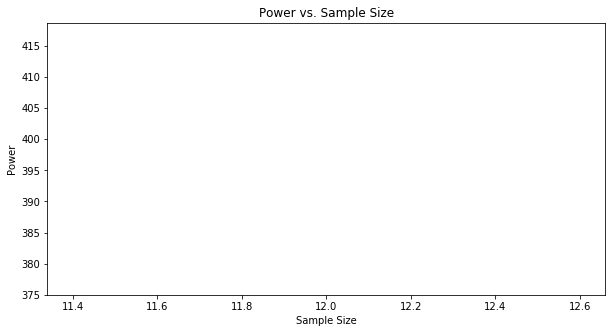

In [19]:
# Plot a sample size X Power line graph 
plt.figure(figsize=(10,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = power_sample
df = pandas.DataFrame(ans, index=None)
plt.plot(df[0], df[1])

plt.show()

This output indicates that in order to get the required power (80%) to detect a difference of 0.17, you would need considerably higher number of patients. 

## BONUS: Investigating the Relationship Between Power, Sample Size and Effect Size

You've seen how to calculate power given alpha, sample size and effect size. To further investigate this relationship, it is interesting to plot the relationship between power and sample size for various effect sizes. 

To do this, run multiple simulations for varying parameters. Then store the parameters and plot the resulting dataset. Specifically:

1. Use a value of $\alpha$ = 0.05 for all of your simulations
2. Use the following effect sizes: [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
3. Use the sample sizes from 10 to 500
4. For each effect size sample size combination, calculate the accompanying power
5. Plot a line graph of the power vs sample size relationship. You should have 7 plots; one for each of the effect sizes listed above. All 7 plots can be on the same graph, but should be labelled appropriately. Plot the power on the y-axis and sample size on the x-axis.

## Summary

In this lesson, you gained further practice with "statistical power" and how it can be used to analyze experimental design. You ran a simulation to determine the sample size that would provide a given value of power (for a given alpha and effect size). Running simulations like this as well as further investigations regarding required sample sizes for higher power thresholds or smaller effect sizes is critical in designing meaningful experiments where one can be confident in the subsequent conclusions drawn.